# Сборный проект: интернет-магазин компьютерных игр.

---

## 1. Общая информация о данных

Сразу импортируем все библиотеки, которыми мы будем пользоваться.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from toads import *

### Откроем и изучим файл с данными.

In [2]:
file_path = '../../../Games/datasets/games.csv'
data = pd.read_csv(file_path)

Посмотрим, что удастся выяснить о данных при помощи стандартных методов:

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- Заметны пропуски в столбцах с рейтингом и оценками. Это может быть связано с годом выпуска игр.
- Столбцы названы понятно, но неудобно для доступа. Изменим их во время предобработки.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Типы данных в столбцах с годом выпуска и рейтингом среди критиков и пользователей имеют неподходящий тип данных.
- Пропуски в названиях двух игр и двух жанрах. Скорее всего, они симметричны.
- Год выпуска известен не для всех игр.

В некоторых случаях будем использовать функции-помощники для личного удобства и автоматизации:

In [5]:
desc(data)

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


- В данных о продажах даже 3 квартиль имеет подозрительно низкое числовое значение в сравнении с максимумом. Это может указывать на то, что некоторые игры были эксклюзивными для какого-то одного региона, а в остальных регионах продажи приравнены к нулю. Это явление способно сместить медиану и среднее.

### Вывод из первичного изучения данных:
- Существуют пропуски, причины которых нужно понять.
- Возможно, что некоторые пропуски заполнены нулями.
- Типы данных не везде соответствуют описываемой информации.
- Названия столбцов требуют внесения изменений.

---

## 2. Предобработка данных

### Названия столбцов

In [6]:
# Приведём столбцы в нижний регистр
data.columns = [s.lower()
       for s in data.columns]

# Переименуем неудобные названия
data.rename({'year_of_release': 'year',
            'rating': 'esrb'}, axis=1, inplace=True)

data.head(1)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


---

### Обработка пропусков
Мы уже видели пропуски в некоторых строках и столбцах на предыдущем этапе. Освежим их в памяти.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  esrb          9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Судя по количеству пропусков, **удалять все строки с пропусками означало бы возможную потерю полезных данных**. Поскольку для нас **важны сведения о годах**, для начала мы рассмотрим строки, в которых отсутствует год выпуска. Проверим, насколько велика доля таких строк.

In [8]:
na_part(data, 'year')

Доля пропусков в столбце "year" равна 1.6%


In [9]:
# 1.6% - не так много, поэтому удалим эти строки.
data.dropna(subset=['year'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [10]:
# Проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16446 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16444 non-null  object 
 4   na_sales      16446 non-null  float64
 5   eu_sales      16446 non-null  float64
 6   jp_sales      16446 non-null  float64
 7   other_sales   16446 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    9839 non-null   object 
 10  esrb          9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Остались ещё две строки с неизвестным названием и жанром игры.

In [11]:
data.query('name.isna()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb
652,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две игры для Sega Genesis. Невелика потеря для прогнозов на 2017 год. У этих же игр неизвестен жанр. Удалим строки.

In [12]:
data.dropna(subset=['name'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [13]:
# Посмотрим, что осталось
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  float64
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  7983 non-null   float64
 9   user_score    9839 non-null   object 
 10  esrb          9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


С удалением очевидных пропусков всё получилось. Теперь посмотрим, что происходит с пропусками в рейтингах игр.

In [14]:
data.query('critic_score.isna()').head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Бросается в глаза, что оценки критиков, пользователей и рейтинг ESRB **отсутствуют в похожих случаях**:
- **Игры выпущены** только **для** какого-то **одного региона** и малоизвестны. Потенциал таких игр сложно оценить, но они почти наверняка менее успешны, чем игры, выходящие для пользователей из всех регионов.
- Игры выпущены в далёком прошлом, когда не всем играм присваивался рейтинг ESRB или оценки в стиле Metacritic.

Посмотрим, есть ли смысл заполнять пропуски в рейтинге ESRB.

In [15]:
na_part(data, 'esrb')

Доля пропусков в столбце "esrb" равна 40.6%


Довольно большая доля пропусков. Можно попытаться **заполнить ESRB, основываясь на самих играх**: это будет наименее деструктивным способом заполнения.

In [16]:
# Создадим таблицу-словарь ESRB для игр, где он указан
game_esrbs = data.groupby('name').agg({'esrb': 'first'}).dropna()
game_esrbs.sample(3)

,esrb
name,
Finding Nemo: The Continuing Adventures,E
Disney's Stitch: Experiment 626,E
Ultimate Marvel vs. Capcom 3,T


In [17]:
# Заполним столбец ESRB
data.loc[data.esrb.isna(), 'esrb'] = data[data.esrb.isna()].apply(fill_from,
                                                                  args=('name', 'esrb', game_esrbs),
                                                                  axis=1)

In [18]:
na_part(data, 'esrb')
del game_esrbs

Доля пропусков в столбце "esrb" равна 38.1%


2.5% разницы, но мы смогли их заполнить.

Применим похожее заполнение по игре на столбцах с оценками пользователей и критиков: Учитывая небольшое количество консолей, мы вряд ли сильно исказим данные при таком заполнении. Тем более, что **агрегировать** оценки **будем по медиане**.

In [19]:
# Оценки критиков
game_critic_score = data.groupby('name').agg({'critic_score': 'median'}).dropna()

In [20]:
game_critic_score.head()

,critic_score
name,
Tales of Xillia 2,71.0
.hack//Infection Part 1,75.0
.hack//Mutation Part 2,76.0
.hack//Outbreak Part 3,70.0
007 Racing,51.0


У оценок игроков есть проблемы с неверным типом данных. Мы вернёмся к ним позже. А сейчас заполним пропуски в оценках критиков.

In [21]:
na_part(data, 'critic_score')
data.loc[data['critic_score'].isna(), 'critic_score'] = data[data['critic_score'].isna()].apply(fill_from,
                                                                  args=('name', 'critic_score', game_critic_score),
                                                                  axis=1)
na_part(data, 'critic_score')

Доля пропусков в столбце "critic_score" равна 51.5%
Доля пропусков в столбце "critic_score" равна 45.7%


Мы заполнили всего 5% пропусков, но это определённо полезное действие.

#### Вывод из обработки пропусков
- Мы удалили из таблицы игры, у которых не указан год выпуска (год для нас важен), и две игры без названия и жанра.
- Мы **не стали злоупотреблять удалением игр**, у которых не указаны оценки, потому что их число очень велико. Мы сможем отсеять их в любой нужный момент.
- Заполнение пропусков в столбце *ESRB* по названию игры дало небольшой, но приятный результат. Повторить то же самое на оценках удалось частично: оценки пользователей пока что имеют несовместимый тип.
- По мере необходимости мы будем приспосабливать датасет к нашим исследованиям и поймём, насколько нам будут мешать пропуски.

---

### Типы данных

Нас интересует тип данных в столбцах с годом выпуска и оценками критиков и пользователей.

#### Год выпуска

In [22]:
# Год удобнее всего считать в целых числах
data.year = data.year.astype('Int64')
data.year.dtype

Int64Dtype()

#### Оценка критиков
Узнаем, можем ли без потерь перевести тип данных в int.

In [23]:
data.critic_score.unique()

array([76. ,  nan, 82. , 80. , 89. , 58. , 87. , 91. , 61. , 97. , 95. ,
       77. , 88. , 83. , 94. , 93. , 85. , 86. , 98. , 96. , 90. , 84. ,
       73. , 74. , 78. , 92. , 71. , 72. , 68. , 62. , 49. , 42. , 67. ,
       81. , 66. , 56. , 44.5, 79. , 70. , 59. , 64. , 75. , 60. , 63. ,
       62.5, 69. , 50. , 25. , 44. , 55. , 80.5, 48. , 75.5, 57. , 29. ,
       74.5, 47. , 65. , 77.5, 54. , 20. , 61.5, 53. , 37. , 52. , 82.5,
       38. , 33. , 30. , 32. , 53.5, 43. , 45. , 51. , 68.5, 40. , 46. ,
       83.5, 86.5, 85.5, 39. , 73.5, 70.5, 34. , 96.5, 57.5, 59.5, 65.5,
       90.5, 69.5, 81.5, 41. , 54.5, 92.5, 88.5, 72.5, 36. , 78.5, 60.5,
       40.5, 87.5, 31. , 27. , 35. , 26. , 67.5, 19. , 71.5, 66.5, 28. ,
       23. , 39.5, 91.5, 31.5, 42.5, 24. , 21. , 35.5, 49.5, 52.5, 17. ,
       79.5, 19.5, 48.5, 28.5, 63.5, 56.5, 50.5, 13. , 64.5, 76.5])

Столбец с оценками критиков не выглядит отталкивающе даже несмотря на присутствие дробных чисел. Оставим его в таком виде. Это будет неким сглаживанием нашего заполнения.

#### Оценка пользователей
Оценка пользователей имеет тип *object*. Нужно понять, что помешало столбцу сразу стать float.

In [24]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Потенциально проблемные места - *tbd* и *nan*:
- tbd (to be determined) означает, что **рейтинг не сформирован** из-за недостаточного количества оценок пользователей.
- nan тоже намекает на то, что рейтинг по каким-то причинам отсутствует. Скорее всего, по тем же самым.

Предположим, что **tbd равносильно пропуску** в данных, тогда:

In [25]:
# Попробуем перевести столбец в числовой тип. Ошибки преобразуем в NaN.
data.user_score = pd.to_numeric(data.user_score, errors='coerce')

In [26]:
data.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Оценки у пользователей идут по 10-балльной шкале, а у критиков - по 100-балльной. Сделаем их более единообразными.

In [27]:
# Умножим оценки игроков на 10 и сразу сделаем целыми
data.user_score = (data.user_score * 10)

In [28]:
data.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь оценки игроков выглядят сравнимо с оценками критиков. Можно заполнить их по названиям игр, как мы собирались сделать изначально.

In [29]:
# Соберём оценки от игроков по играм
game_user_score = data.groupby('name').agg({'user_score': 'median'}).dropna()

In [30]:
# Применим заполнение и отобразим результаты
na_part(data, 'user_score')
data.loc[data['user_score'].isna(), 'user_score'] = data[data['user_score'].isna()].apply(fill_from,
                                                                  args=('name', 'user_score', game_user_score),
                                                                  axis=1)
na_part(data, 'user_score')

Доля пропусков в столбце "user_score" равна 54.6%
Доля пропусков в столбце "user_score" равна 48.2%


И ещё *6%* данных **удалось восстановить**.

In [31]:
data.user_score.unique()

array([80. ,  nan, 83. , 85. , 66. , 84. , 86. , 77. , 63. , 74. , 82. ,
       90. , 79. , 81. , 87. , 71. , 34. , 53. , 48. , 32. , 89. , 64. ,
       78. , 75. , 26. , 72. , 92. , 70. , 73. , 43. , 76. , 57. , 50. ,
       91. , 65. , 46.5, 88. , 69. , 94. , 68. , 61. , 67. , 54. , 40. ,
       42.5, 49. , 45. , 93. , 62. , 42. , 85.5, 60. , 37. , 41. , 58. ,
       56. , 55. , 44. , 46. , 59. , 39. , 41.5, 31. , 69.5, 29. , 52. ,
       62.5, 73.5, 77.5, 33. , 22. , 47. , 51. , 70.5, 35. , 75.5, 25. ,
       19. , 30. , 27. , 20. , 95. , 43.5, 72.5, 21. , 36. , 97. , 28. ,
       76.5, 86.5, 65.5, 18. , 59.5, 83.5, 38. , 82.5,  0. , 16. , 66.5,
       79.5, 96. , 67.5, 88.5, 74.5, 56.5, 78.5, 24. , 89.5, 71.5, 63.5,
       68.5, 17. , 54.5, 11. , 60.5, 58.5,  3. , 53.5, 13. , 64.5, 47.5,
       61.5, 14. , 55.5, 15. , 44.5, 57.5,  7. , 12. , 23. ,  5. , 40.5,
        2. , 84.5,  6. , 32.5,  9. , 10. , 80.5, 39.5, 81.5, 37.5, 87.5,
       50.5])

Аналогично столбцу с оценками критиков, мы оставим оценки игроков в вещественном виде.

#### Рейтинг ESRB

Посмотрим, какие вообще бывают рейтинги.

In [32]:
data.esrb.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Буквенные обозначения недостаточно информативны для быстрого понимания. Переведём их в числовой тип **соответственно возрасту**, начиная с которого можно играть в игры с тем или иным рейтингом. (Повезло, что мы в России живём).

Мы не будем избавляться от самого рейтинга, а добавим новый столбец с возрастами, соответствующими рейтингам.

In [33]:
# Создадим столбец с возрастными категориями
data.loc[:, 'age'] = data.esrb

*RP* по сути означает **отсутствие рейтинга**, так как он не был присвоен. Как и *NaN*. В таких случаях можно приравнять ячейки к *NaN*.

In [34]:
# Заменим буквы на числа
data.age.replace({'E': 6, 'M': 17, 'T': 13, 'E10+': 10, 'K-A': 6, 'AO': 18, 'EC': 3, 'RP': np.nan}, inplace=True)

In [35]:
# Посмотрим на результат
data.age.unique()

array([ 6., nan, 17., 13., 10., 18.,  3.])

In [36]:
# Приведём к целым числам
data.age = data.age.astype('Int64')

In [37]:
data.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb,age
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,6
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,<NA>
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,6
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,6
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,<NA>


#### Строковые данные
Чтобы предупредить дублирование данных, мы приведём **строковые столбцы в нижний регистр**. ESRB трогать не будем, потому что мы его уже проверили вручную.

In [38]:
for col in ['name', 'platform', 'genre']:
    data.loc[:, col] = data[col].str.lower()

In [39]:
data.head(3)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb,age
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,80.0,E,6
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,<NA>
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,83.0,E,6


#### Вывод из изменения типов данных
- Год выпуска игры теперь имеет целочисленный вид.
- Вещественные типы данных в столбцах с оценками игроков и критиков мы оставили как есть.
- Из столбца с рейтингом ESRB мы извлекли возраст, с которого можно играть в те или иные игры.
- Строковые данные переведены в нижний регистр.

---

## Обработка дубликатов
Список длинный, и есть вероятность, что какие-то позиции окажутся грубыми дубликатами.

In [40]:
data.duplicated().sum()

0

Искать дубликаты по названию игры нет смысла, потому что одна и та же игра может выпускаться на разных платформах. Посмотрим на жанры игр и платформы.

In [41]:
for col in ['genre', 'platform']:
    print(col, ':', data[col].unique(),end='\n' * 2)

genre : ['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy']

platform : ['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']



Визуально **отсутствуют** какие-либо **подозрительные явления**.

### Вывод из предобработки данных
- Мы воздержались от удаления пропущенных значений настолько, насколько это возможно.
- Применили заполнение данных об оценках и рейтинге ESRB по названиям игр. Это было не очень эффективно, но надёжно с точки зрения точности.
- Перевели типы данных в вид, подходящий для описываемых характеристик.
- Убедились в отсутствии дубликатов, споспобных повредить нашей дальнейшей работе.

Прежде, чем перейти непосредственно к анализу, мы добавим к таблице **дополнительный столбец**.

In [42]:
# Столбец с суммарными продажами со всех регионов
data.loc[:, 'total_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales

---

## 3. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы?
Чтобы ответить на этот вопрос, мы построим столбчатую диаграмму:

In [43]:
# Учтём, что дублирующиеся названия здесь не стоит учитывать.
games_by_year = data.drop_duplicates(subset=['name']).pivot_table(index='year', values='name', aggfunc='count')
games_by_year.sample(4).sort_index()

,name
year,
1981,43
1998,347
2001,410
2006,729


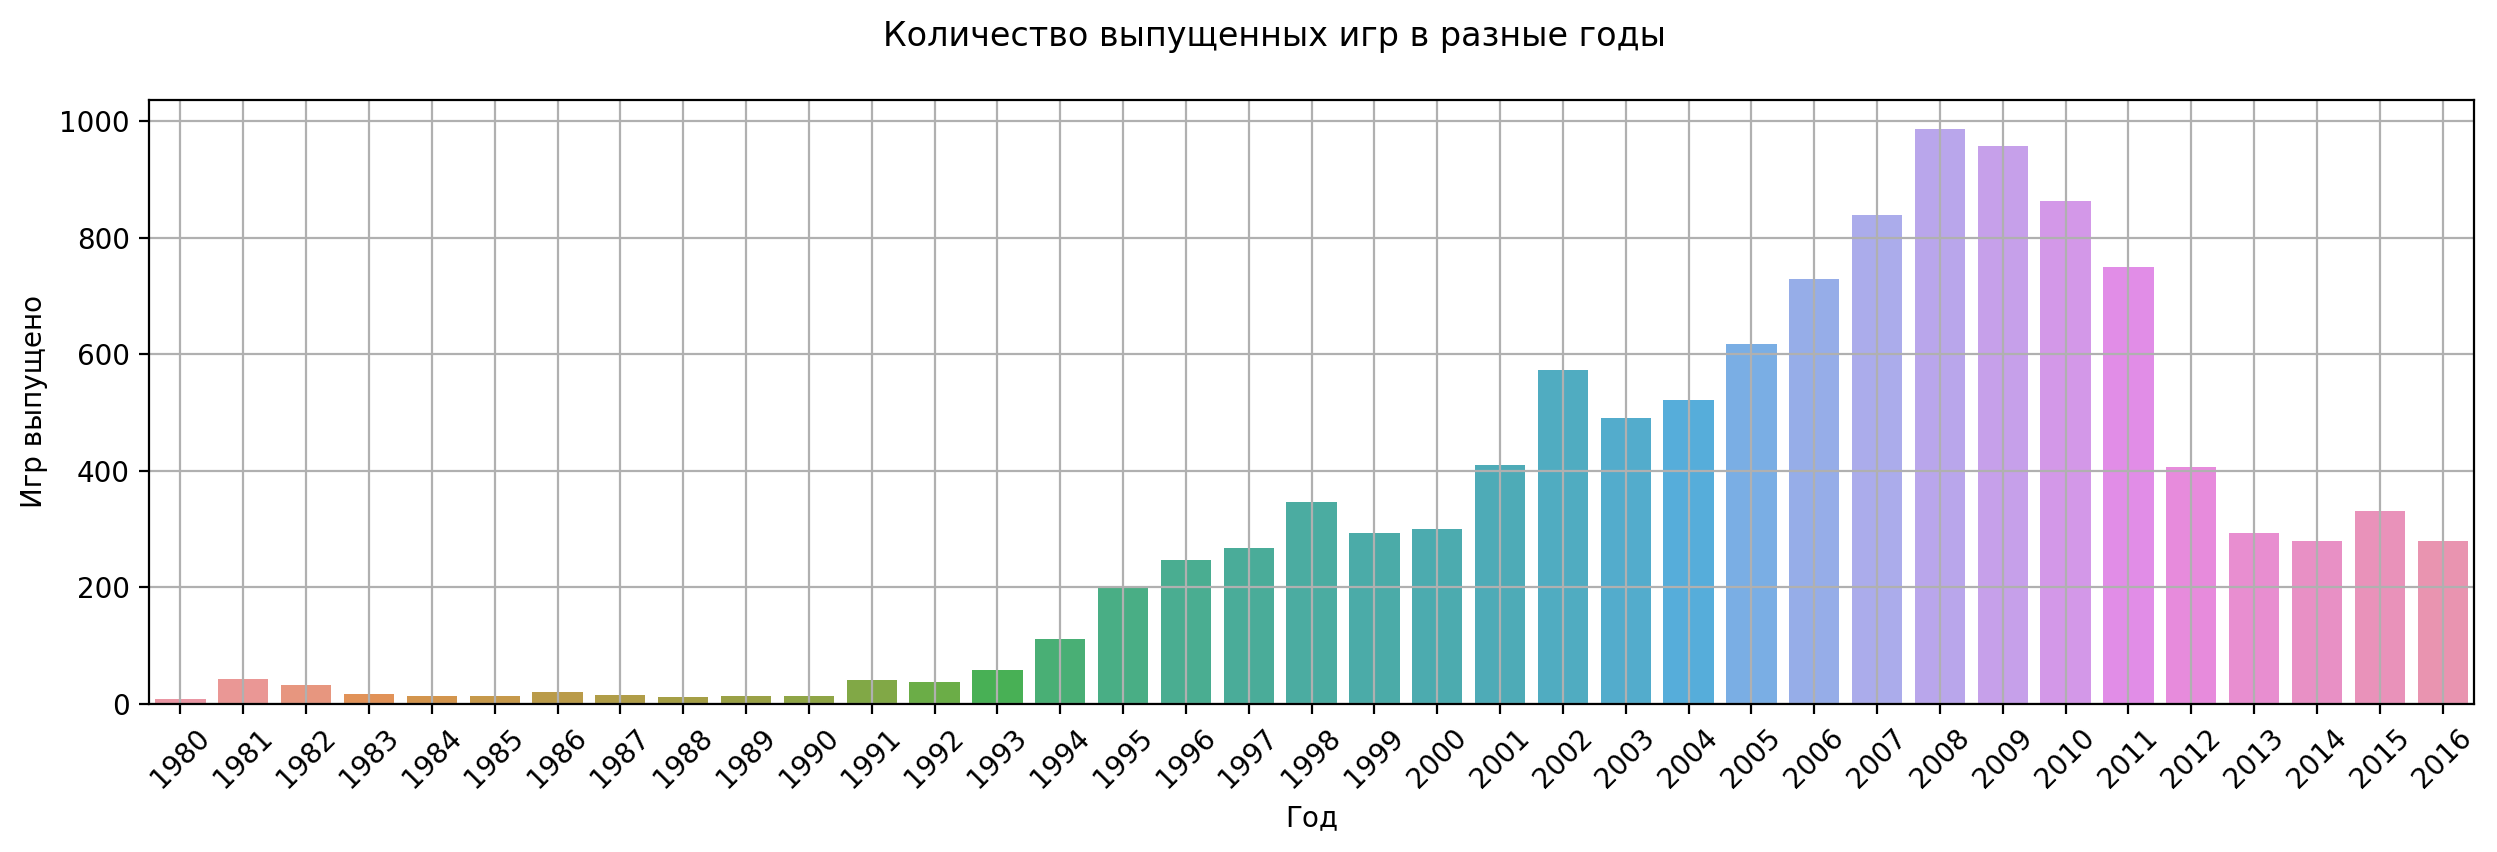

In [44]:
with Image(st='Количество выпущенных игр в разные годы', grid=True):
    sns.barplot(games_by_year.index, games_by_year.name)
    plt.xticks(rotation=45)
    Image.labels('Год', 'Игр выпущено')

Мы видим, что рост количества выпускаемых игр начался с **середины 90-х годов**. Самым плодотворным игровым годом стал *2008* - почти *1000* игр.

---

### Важны ли данные за все периоды?
Вряд ли. Консоли имеют свойство устаревать. Разберёмся, какие игровые платформы набирали популярность за последние несколько лет.

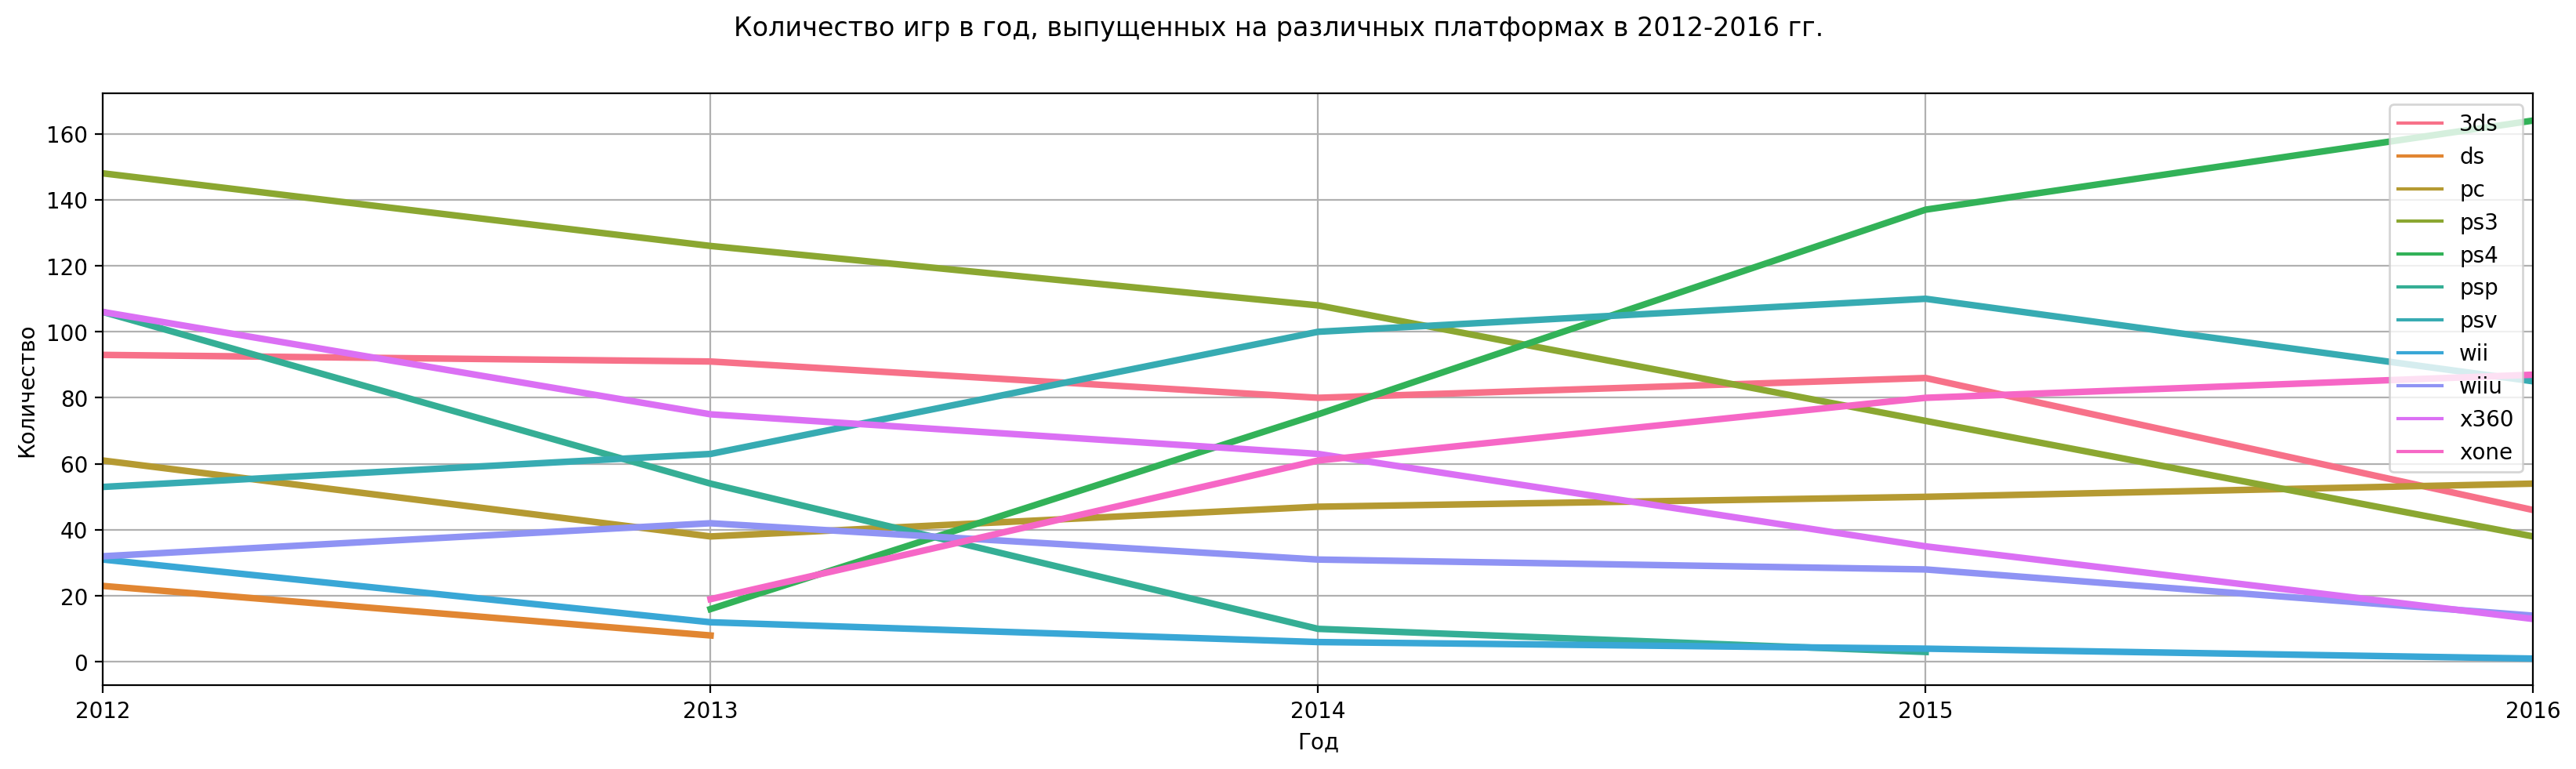

In [45]:
with Image(20, 5, st='Количество игр в год, выпущенных на различных платформах в 2012-2016 гг.', grid=True):
    plt.xticks(range(2012, 2017))
    plt.xlim(2012, 2016)
    sns.lineplot(
        data=data.query('year > 2011').pivot_table(index='year', columns='platform', values='name', aggfunc='count'),
        dashes=False, lw=3
    )
    Image.labels('Год', 'Количество')

Из всего многообразия платформ **только на трёх** виден **рост числа выпускаемых игр**:
- PS4
- Xbox One
- PC

Остальные либо теряют позиции, либо совсем исчезают с радаров (как, например, *Nintendo DS*).

Таким образом, всего **три** игровые **платформы заслуживают нашего** пристального **внимания**. Соответственно, и период времени, связанный с ними, будет для нас наиболее интересным. Будем держать в уме *2013* год как точку начала актуального периода.

---

### Как менялись продажи по платформам?

Выберем платформы с наибольшими суммарными продажами.

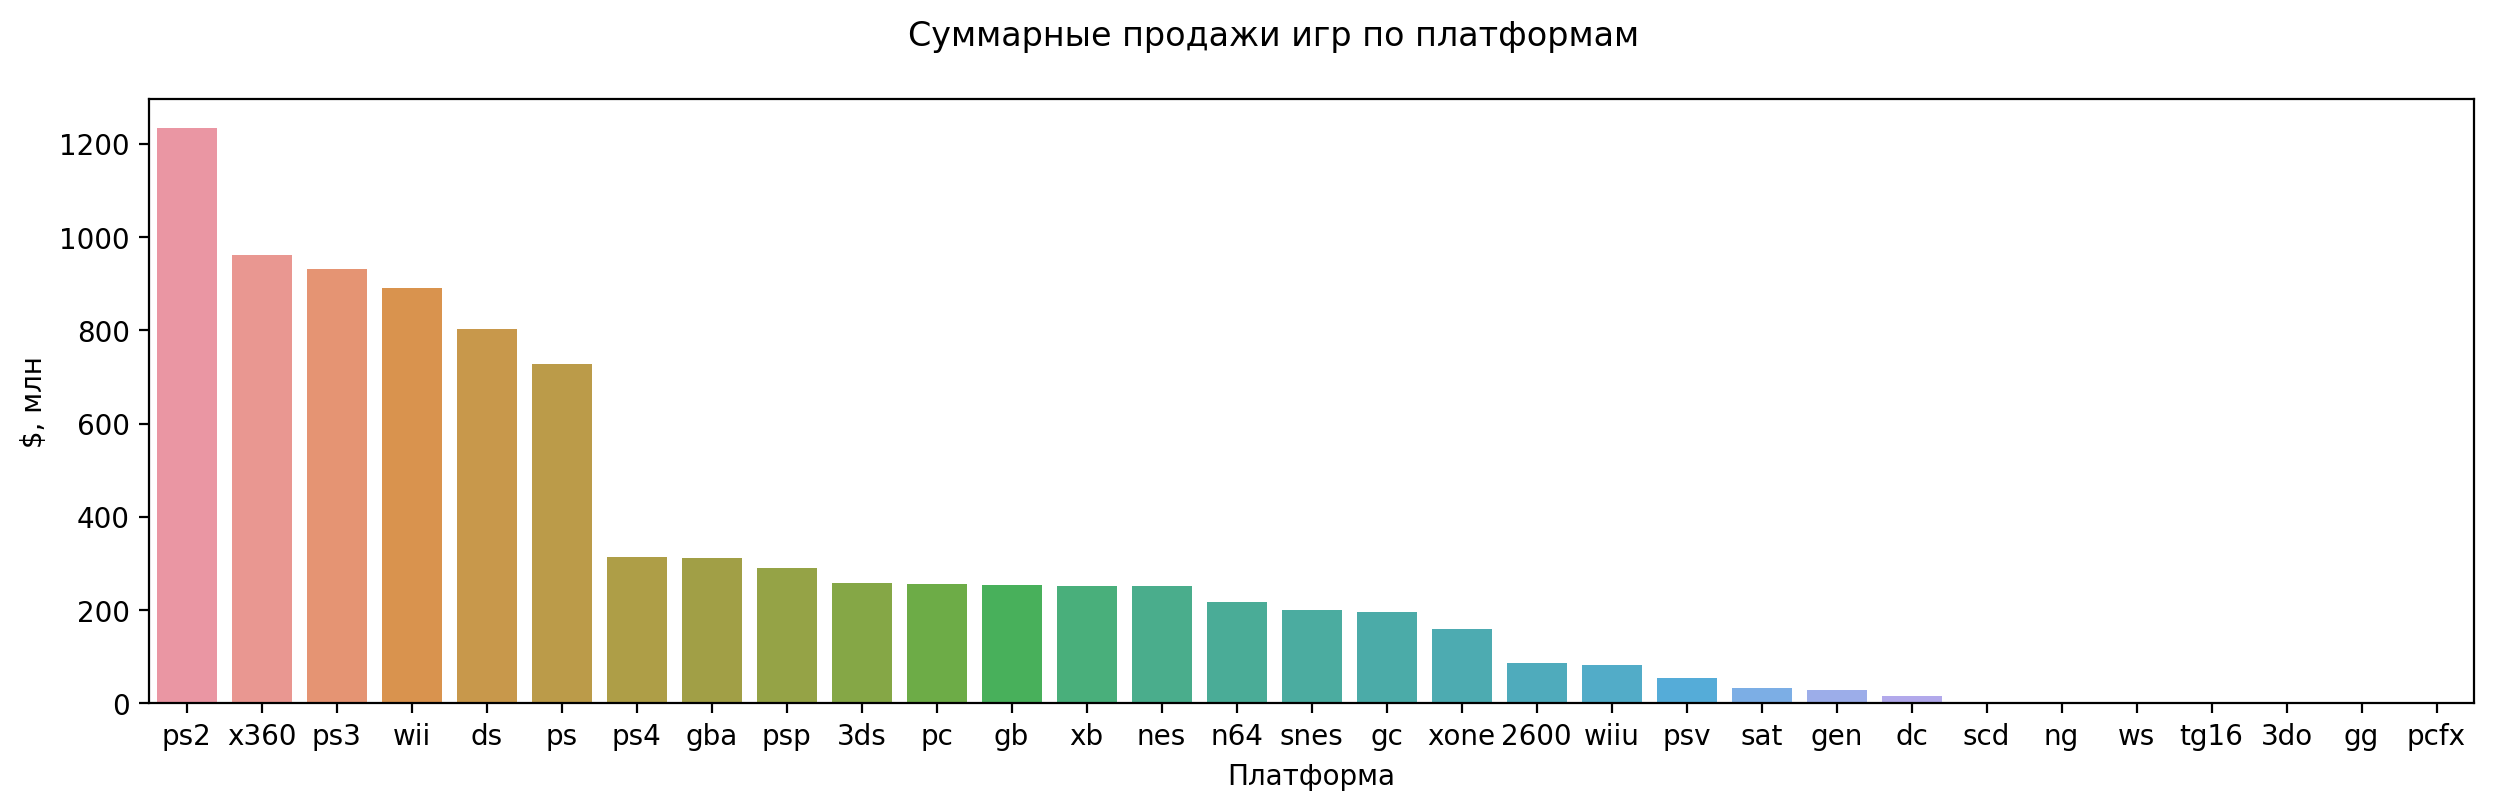

In [46]:
pf_sales = data.pivot_table('total_sales', index='platform', aggfunc='sum').sort_values('total_sales', ascending=False)
with Image(st='Суммарные продажи игр по платформам'):
    sns.barplot(
        pf_sales.index,
        pf_sales.total_sales
    )
    Image.labels('Платформа', '$, млн')

In [47]:
# Выберем 6 самых успешных консолей из диаграммы
top6 = list(pf_sales.total_sales.sort_values(ascending=False).head(6).index)
top6
# Всё верно

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

Посмотрим продажи по годам на этих платформах.

In [48]:
# Сделаем сводную таблицу по годам и платформам
pf_years_sales = data.query('platform in @top6').pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')

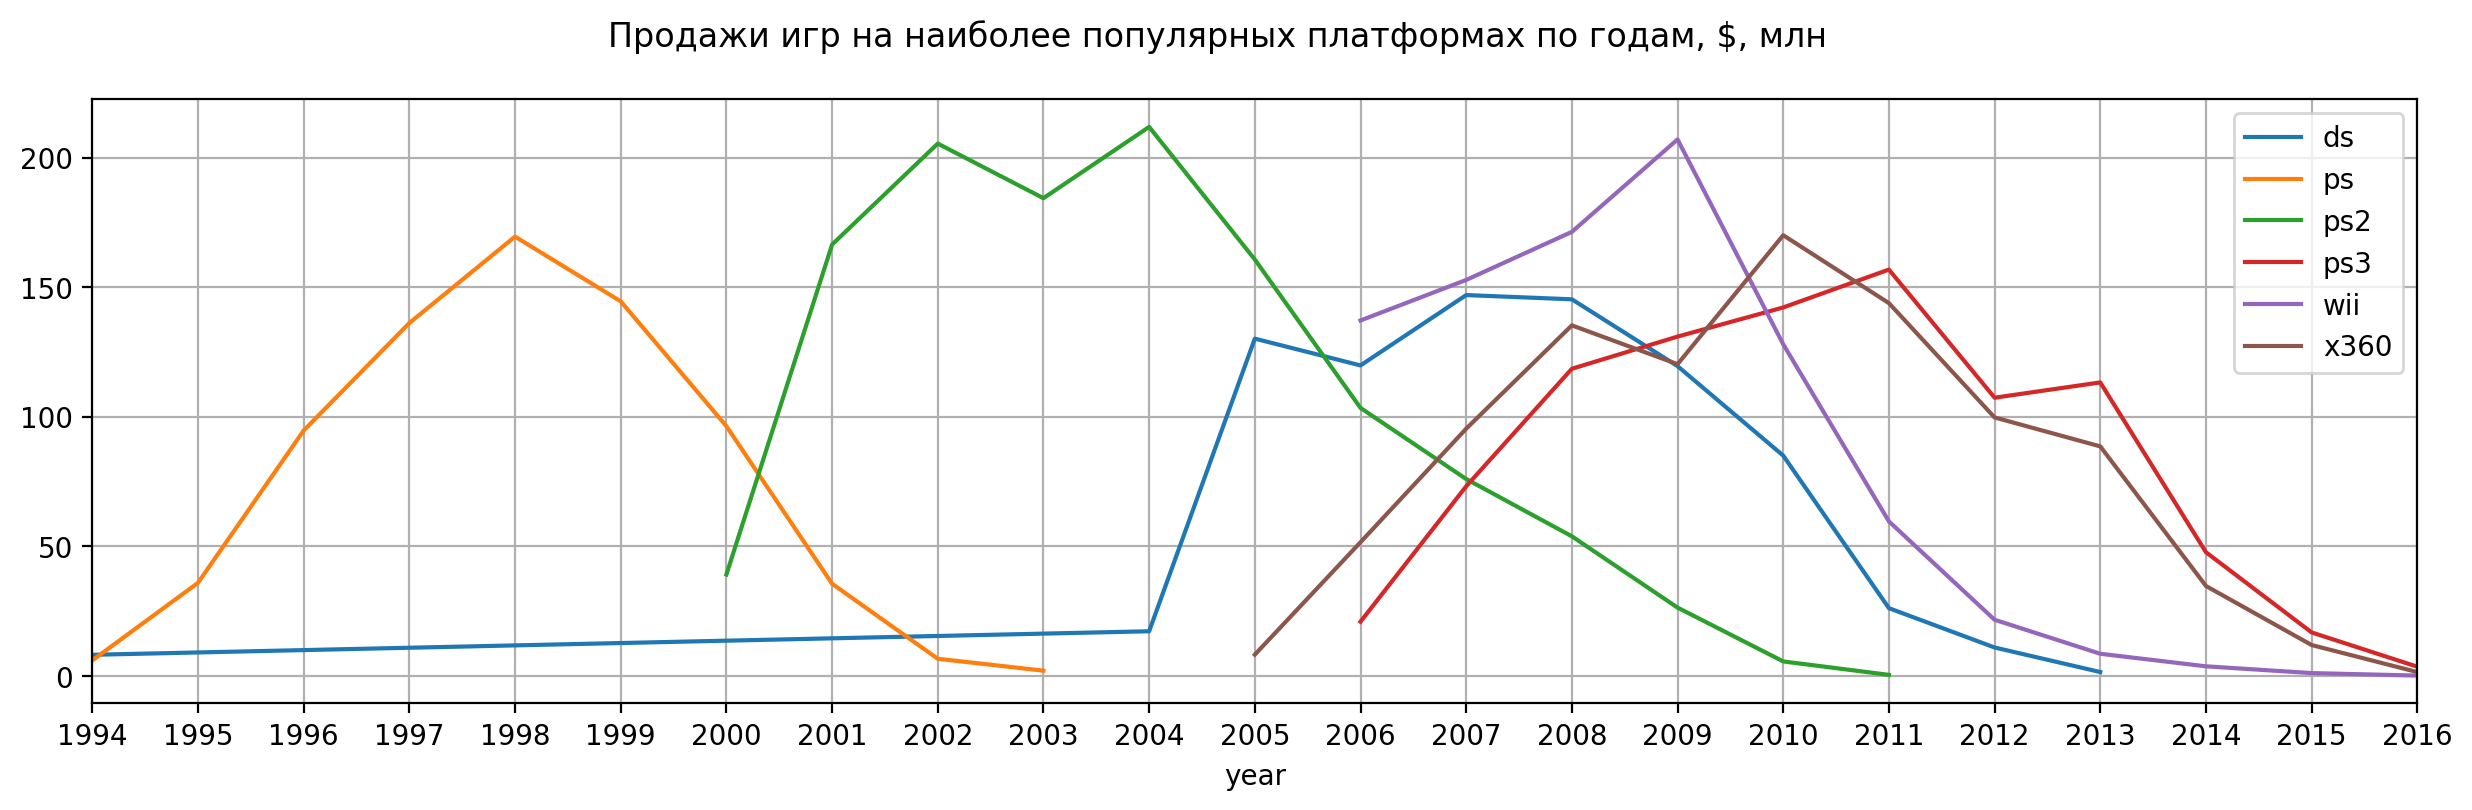

In [49]:
with Image(st='Продажи игр на наиболее популярных платформах по годам, $, млн', grid=True):
    plt.xticks(range(1994, 2017))
    sns.lineplot(data=pf_years_sales, dashes=False)
    plt.xlim(1994, 2016)

Из этого графика видно, что наиболее кассовыми из всех стали консоли *Sony* и *Nintendo*.
- Sony в среднем **достигали пика продаж** на *5* году своего существования, а затем через пару лет появлялась очередная платформа, когда старая начинала морально устаревать.
- У Nintendo **жизни платформ пересекаются** по той причине, что одна консоль - домашняя, а вторая - портативная. Однако длительность жизни схожа с консолями Sony.
- Xbox 360 попал сильно похож по поведению графика на PS3: эти консоли являлись **конкурентами** на рынке, и их параметры очень схожи между собой.

---

### За какой характерный срок появляются новые и исчезают старые платформы?
Мы уже частично ответили на этот вопрос на предыдущем графике, и теперь узнаем, сколько в среднем живёт платформа по выпускаемым на неё играм. Для этого применим **группировку по платформе** и **агрегируем количество лет**, в которые для них выпускались игры.

In [50]:
pf_lifetimes = data.groupby('platform').agg({'year': lambda x: x.nunique()}).sort_values('year', ascending=False)
pf_lifetimes.sample(5)

,year
platform,
nes,12
ps4,4
xb,9
gc,7
3ds,6


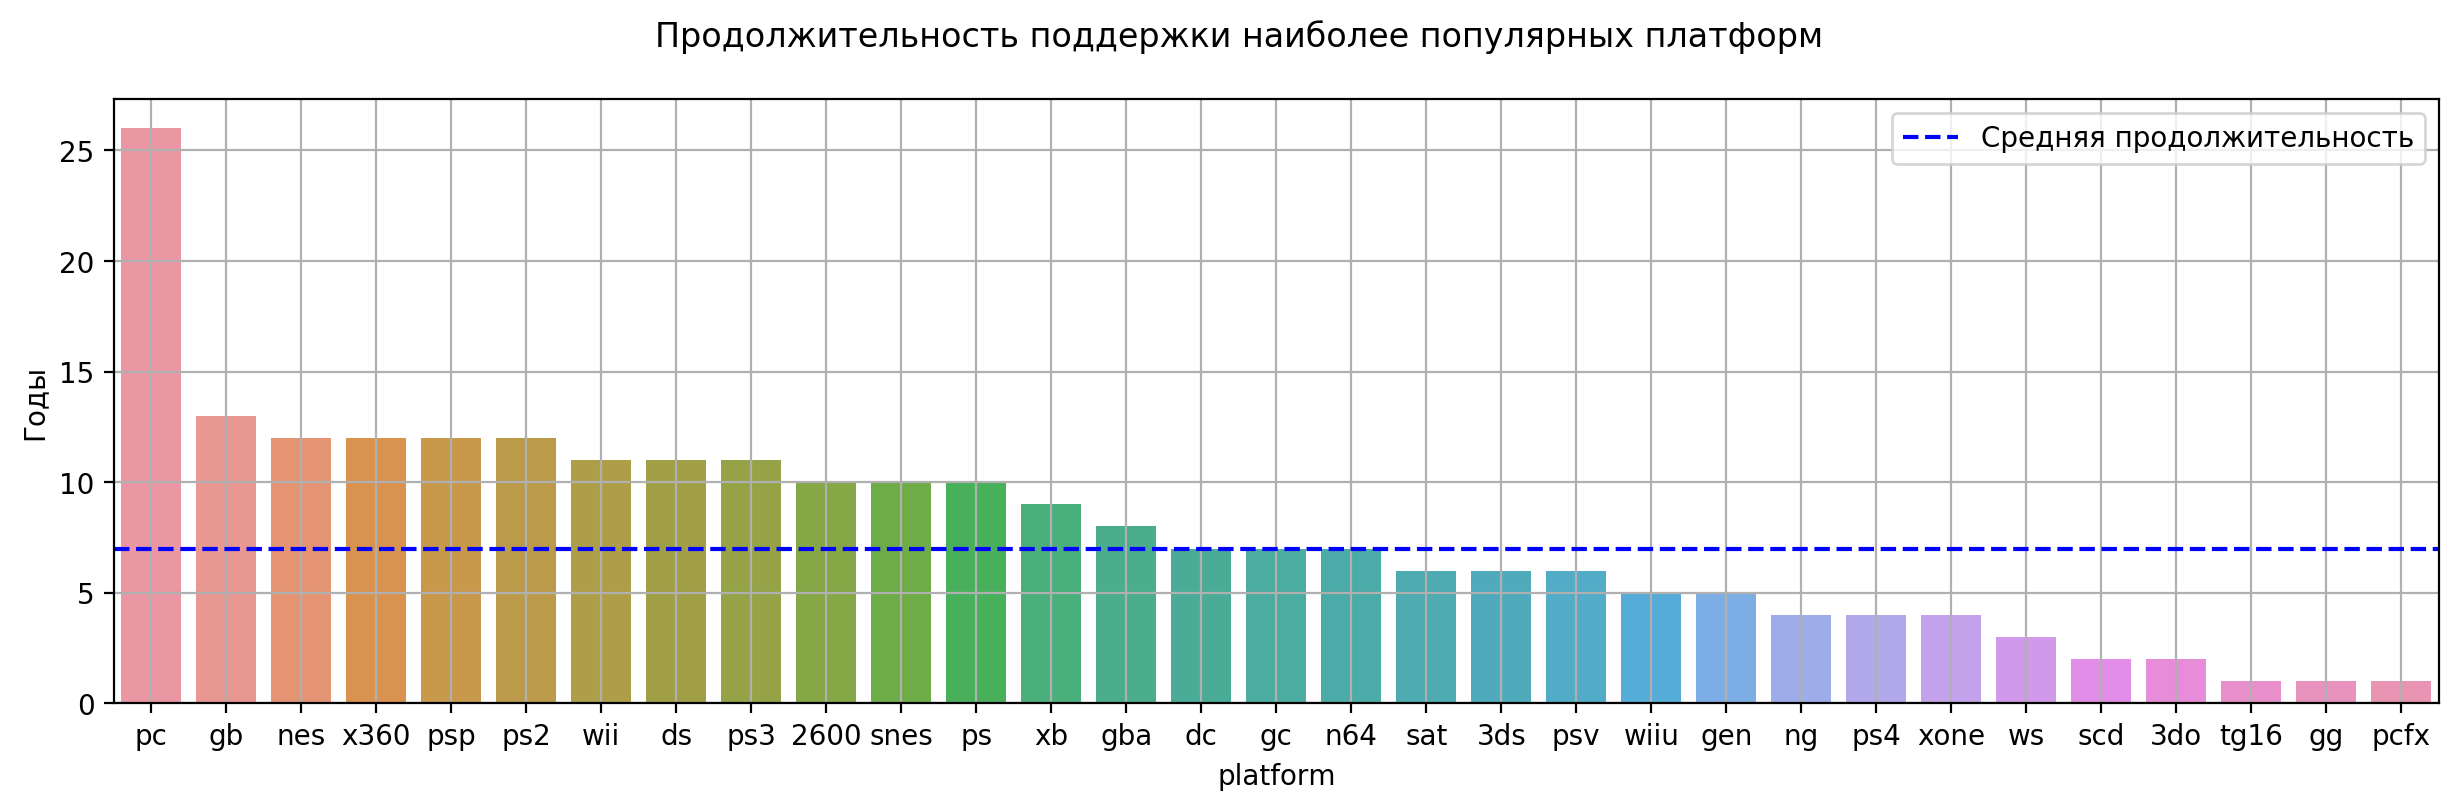

In [51]:
with Image(st='Продолжительность поддержки наиболее популярных платформ', grid=True, legend='a'):
    sns.barplot(pf_lifetimes.index, pf_lifetimes.year)
    plt.axhline(pf_lifetimes.year.median(), c='b', ls='--', label='Средняя продолжительность')
    plt.ylabel('Годы')

- На графике видно, что **самая долгоживущая** игровая платформа - это **персональный компьютер**. Это может быть связано с большими возможностями для модернизации и с тем, что компьютеры подходят не только для игр.
- В среднем мы видим ситуацию, похожую на предыдущий график: **консоли поддерживаются разработчиками в течение около 7 лет**. Учитывая то,что пиковые продажи достигаются несколько раньше, некоторым игроделам стоит обратить на это внимание: *стоит ли вкладывать силы в уходящее поколение или лучше сосредоточиться на настоящем?*

---

### Актуальный период и платформы
Чтобы понять, что будет актуальным для 2017 года, мы обратим внимание на новейшие платформы, которым ещё нет 5 лет на данный момент.

In [52]:
# Агрегируем возраст консолей и годы выпуска первых игр
pf_age = data.groupby('platform').agg({'year': lambda x: 2016 - x.min()}).sort_values('year')
pf_age.columns = ['age']
pf_age = pf_age.join(data.groupby('platform').agg({'year': min}).sort_values('year').year.astype('int'))
pf_age.head(10)

,age,year
platform,,
xone,3,2013
ps4,3,2013
wiiu,4,2012
3ds,5,2011
psv,5,2011
wii,10,2006
ps3,10,2006
x360,11,2005
psp,12,2004


Как видим, **наиболее перспективные платформы** с точки зрения возраста - это Xbox One и PS4. **Актуальным периодом** выберем данные от *2013* года.

***С этого момента речь будет идти только о данных начиная с 2013 года.***

In [53]:
# Выделим срез данных от 2013 года
modern = data.query('year >= 2013')

Взглянем на годовые продажи оставшихся платформ.

In [54]:
modern_pf_sales = modern.pivot_table(index='year', columns='platform', values='total_sales', aggfunc='sum')

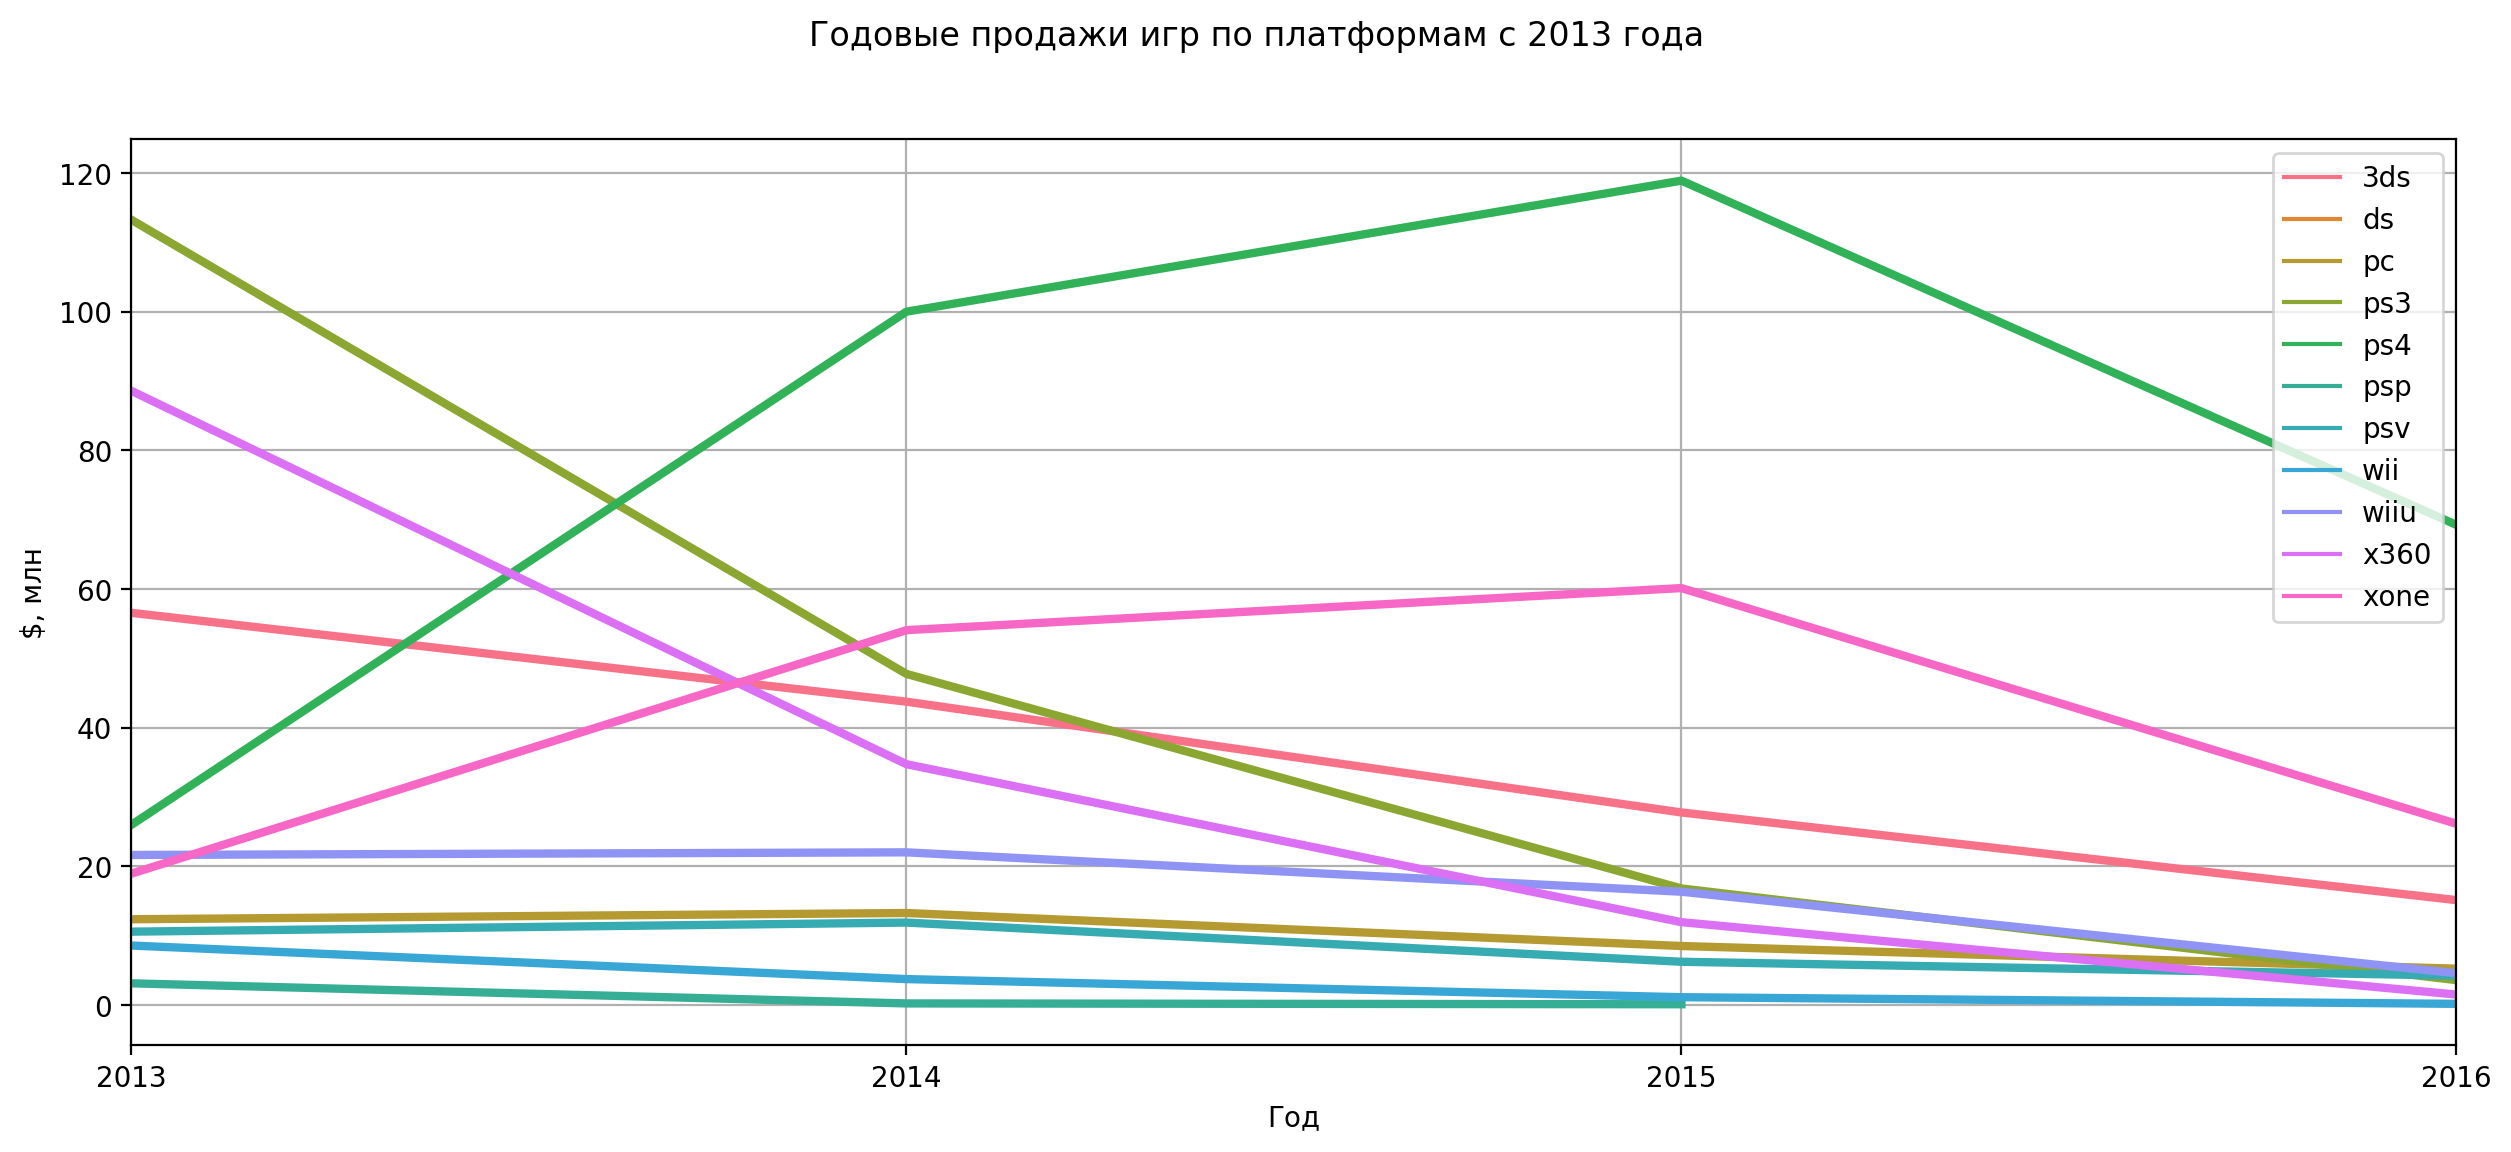

In [55]:
with Image(15, 6, st='Годовые продажи игр по платформам с 2013 года', grid=True):
    plt.xticks(range(2013, 2017))
    plt.xlim(2013, 2016)
    sns.lineplot(data=modern_pf_sales, dashes=False, lw=3)
    Image.labels('Год', '$, млн')

- Наибольшее доверие из всех платформ по продажам всё так же вызывают PS4 и Xbox One.
- Почти все платформы показывают явное снижение продаж. Накладывая эту информацию на возраст платформ, мы наблюдаем очевидное преимущество PS4 и Xbox One.
- Добавим к ним ПК, поскольку он не устаревает. Даже несмотря на сравнительно невысокие продажи, ПК берёт своим постоянством.
- Nintendo мы не включим в топ платформ: Wii U существует на протяжении 4 лет и демонстрирует **постоянное снижение продаж** с самого начала. Опасно делать ставку на продукт, который стабильно теряет позиции.
- PS3 и Xbox 360 мы также не включим в топ, потому что они являются **устаревшим поколением** приставок, хотя и с хорошими продажами для своего времени.

In [56]:
top3 = ['ps4', 'xone', 'pc']

In [57]:
top = modern.query('platform in @top3')

---

### Велика ли разница в продажах?
Построим «ящики с усами» по глобальным продажам игр для перспективных платформм.

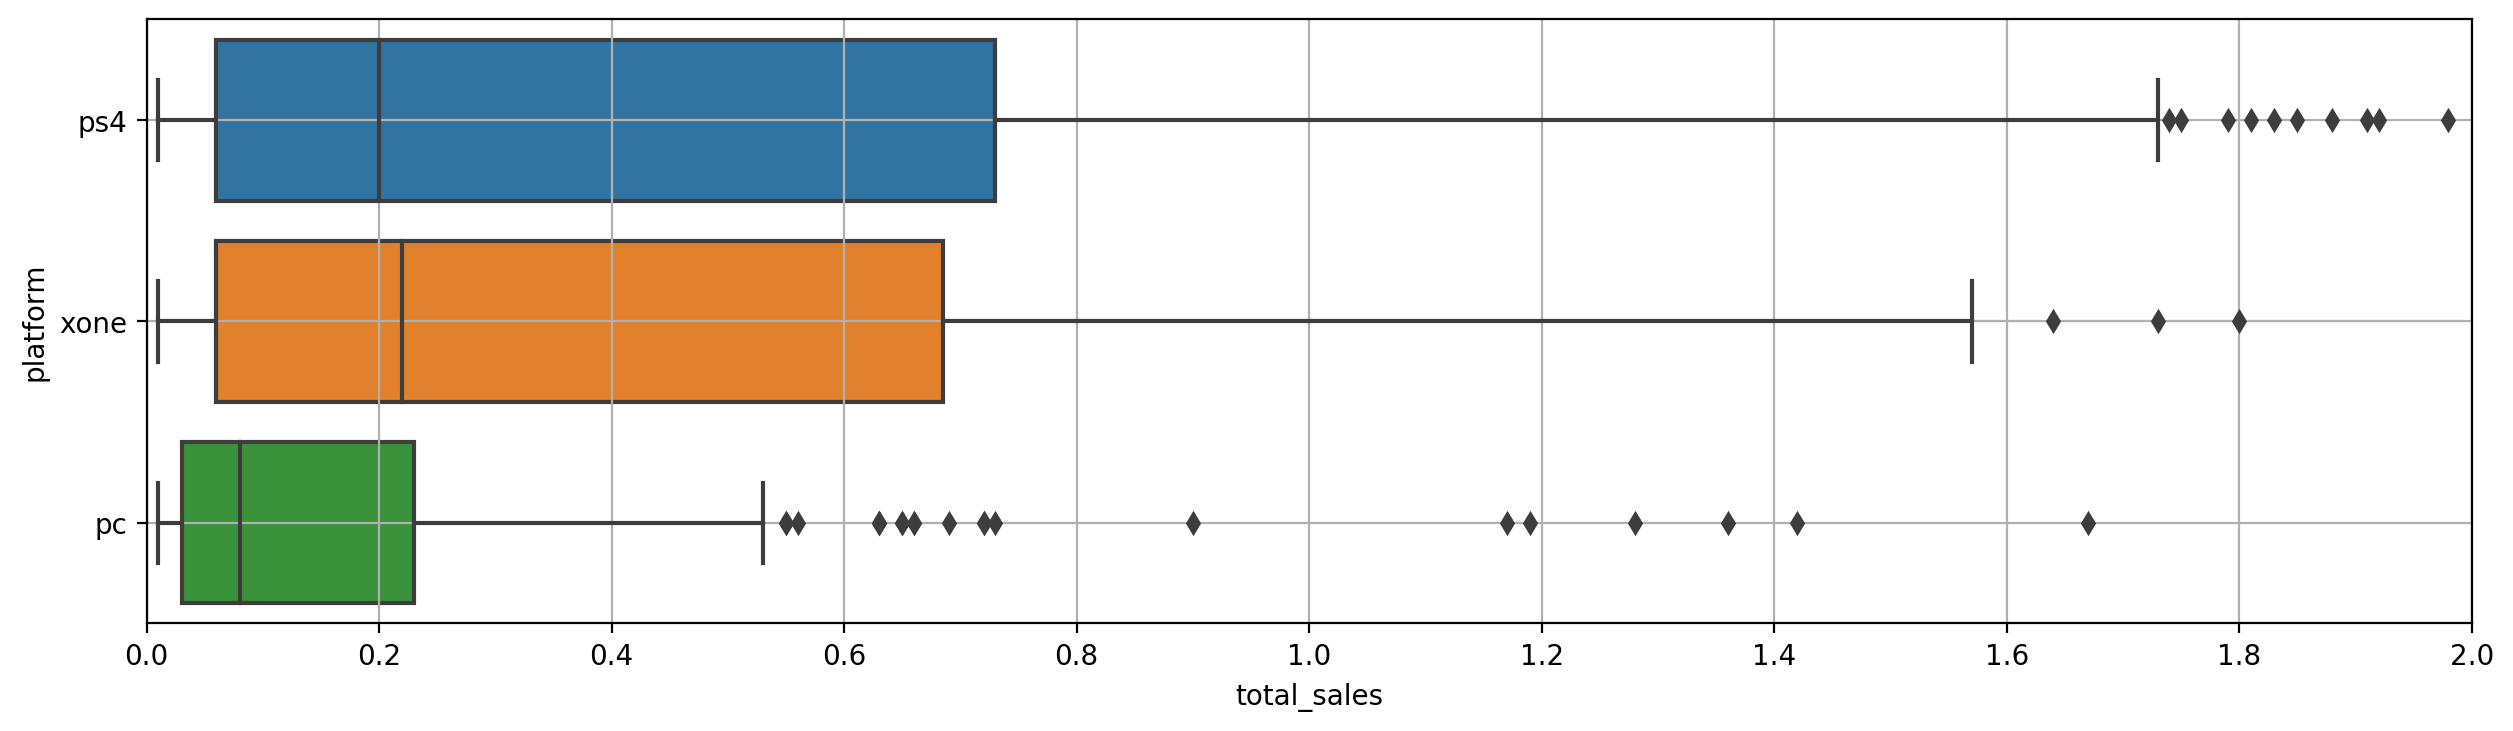

In [58]:
with Image(grid=True):
    plt.xticks([x * 0.2
               for x in range(11)])
    sns.boxplot(x=top.total_sales, y=top.platform)
    plt.xlim(0,2)

- Продажи Xbox One и PS4 невероятно близки по характеристикам своих распределений. Медианы находятся довольно близко, однако у Xbox медиана несколько выше: предположительно, на Xbox меньше "маленьких" игр для узких аудиторий и больше масштабных проектов.
- Значение 3 квартиля больше всего у PS4: с большой вероятностью это означает больший потенциал для высокой прибыли.
- Продажи на ПК значительно ниже, чем на консолях, однако мы видим некоторое количество выбросов в положительную сторону: какие-то из игр продаются значительно лучше, чем другие - на уровне консольных продаж. Важным здесь будет знание того, что **игры на ПК** часто **продаются по более низким ценам**, чем те же самые игры для консолей.

---

### Влияние отзывов критиков и пользователей на продажи
Рассмотрим влияние отзывов на продажи на примере одной из топ-3 платформ.

In [59]:
# Выберем платформу с самым большим количеством наблюдений
top.platform.value_counts()
# PS4 подойдёт лучше всего

ps4     392
xone    247
pc      189
Name: platform, dtype: int64

Посмотрим, как выглядит зависимость продаж от отзывов на диаграмме.

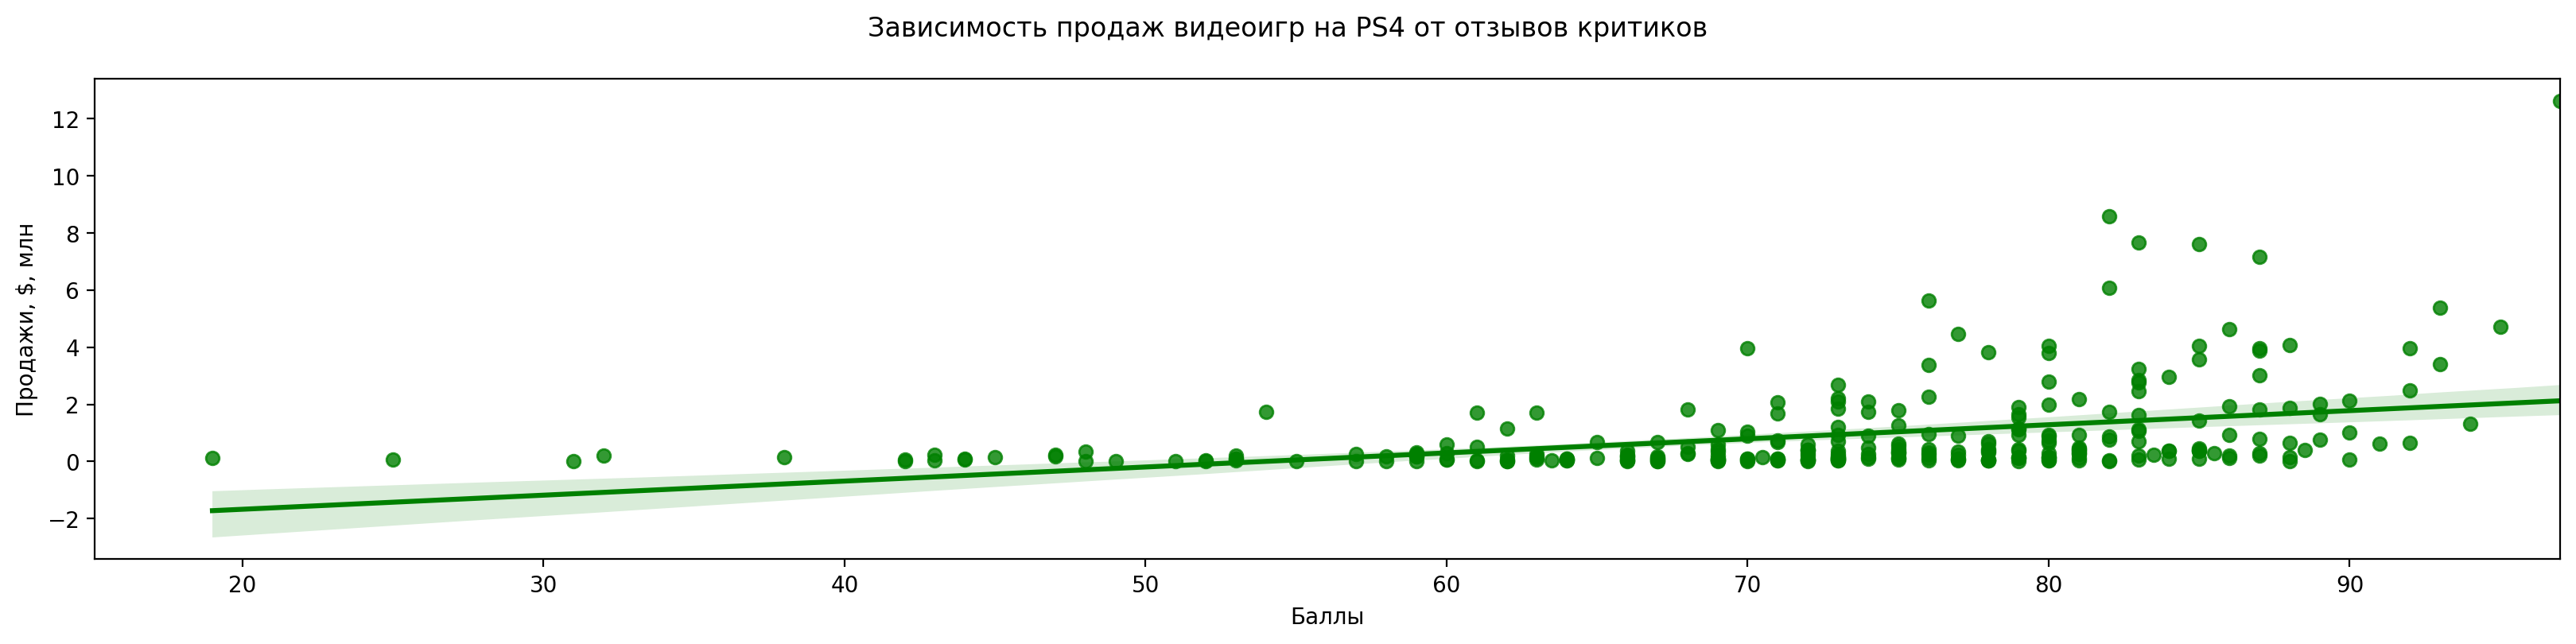

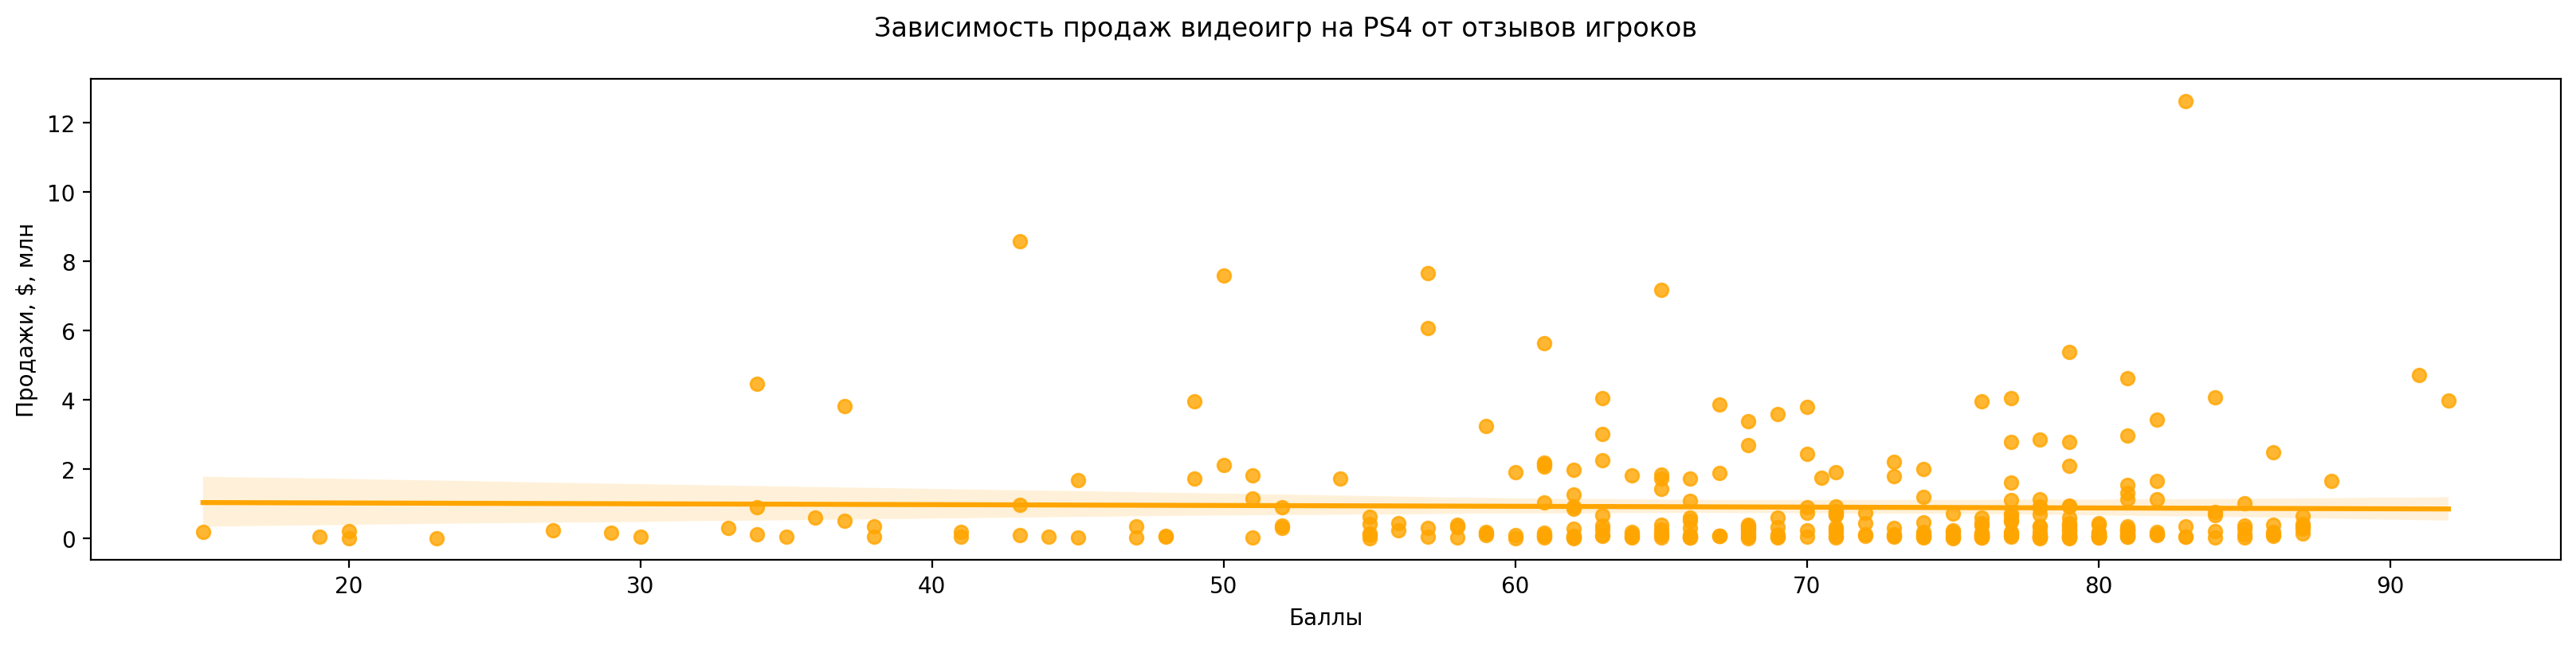

In [60]:
for col, who, c in zip(['critic_score', 'user_score'],
                       ['критиков', 'игроков'],
                       ['g', 'orange']):
    with Image(20, 4, st='Зависимость продаж видеоигр на PS4 от отзывов ' + who):
        sns.regplot(col,
                   'total_sales',
                   data=top.query('platform == "ps4"'),
                   color=c)
        Image.labels('Баллы', 'Продажи, $, млн')

Диаграммы не одинаковы: можно предположить, что у игроков и критиков несколько разнятся критерии оценки продукта.

Теперь посмотрим на корреляцию.

In [61]:
# Посмотрим на корреляцию, выбросим NaN из расчётов
ps4_corr = pd.DataFrame(top.query('platform == "ps4"').dropna().corr().loc['total_sales', ['critic_score', 'user_score']])
ps4_corr

,total_sales
critic_score,0.386467
user_score,-0.034231


- Заметная положительная корреляция с оценками критиков.
- Почти отсутствует корреляция с отзывами игроков.
- Из вышесказанного видим, что **игроки не всегда согласны с мнениями критиков**.

***Соотносятся ли выводы с продажами игр на других платформах?*** Нам достаточно будет проверить корреляцию продаж и отзывов для ПК и Xbox One.

In [62]:
# Посчитаем оставшуюся корреляцию
pc_corr, xone_corr = [top.query('platform == "{}"'.format(pf))
                       .dropna()
                       .corr()
                       .loc['total_sales', ['critic_score', 'user_score']]
                       for pf in ['pc', 'xone']]

In [63]:
# Соберём всё в одну таблицу
top_corr = pd.concat([ps4_corr, xone_corr, pc_corr], axis=1)
top_corr.columns = top3

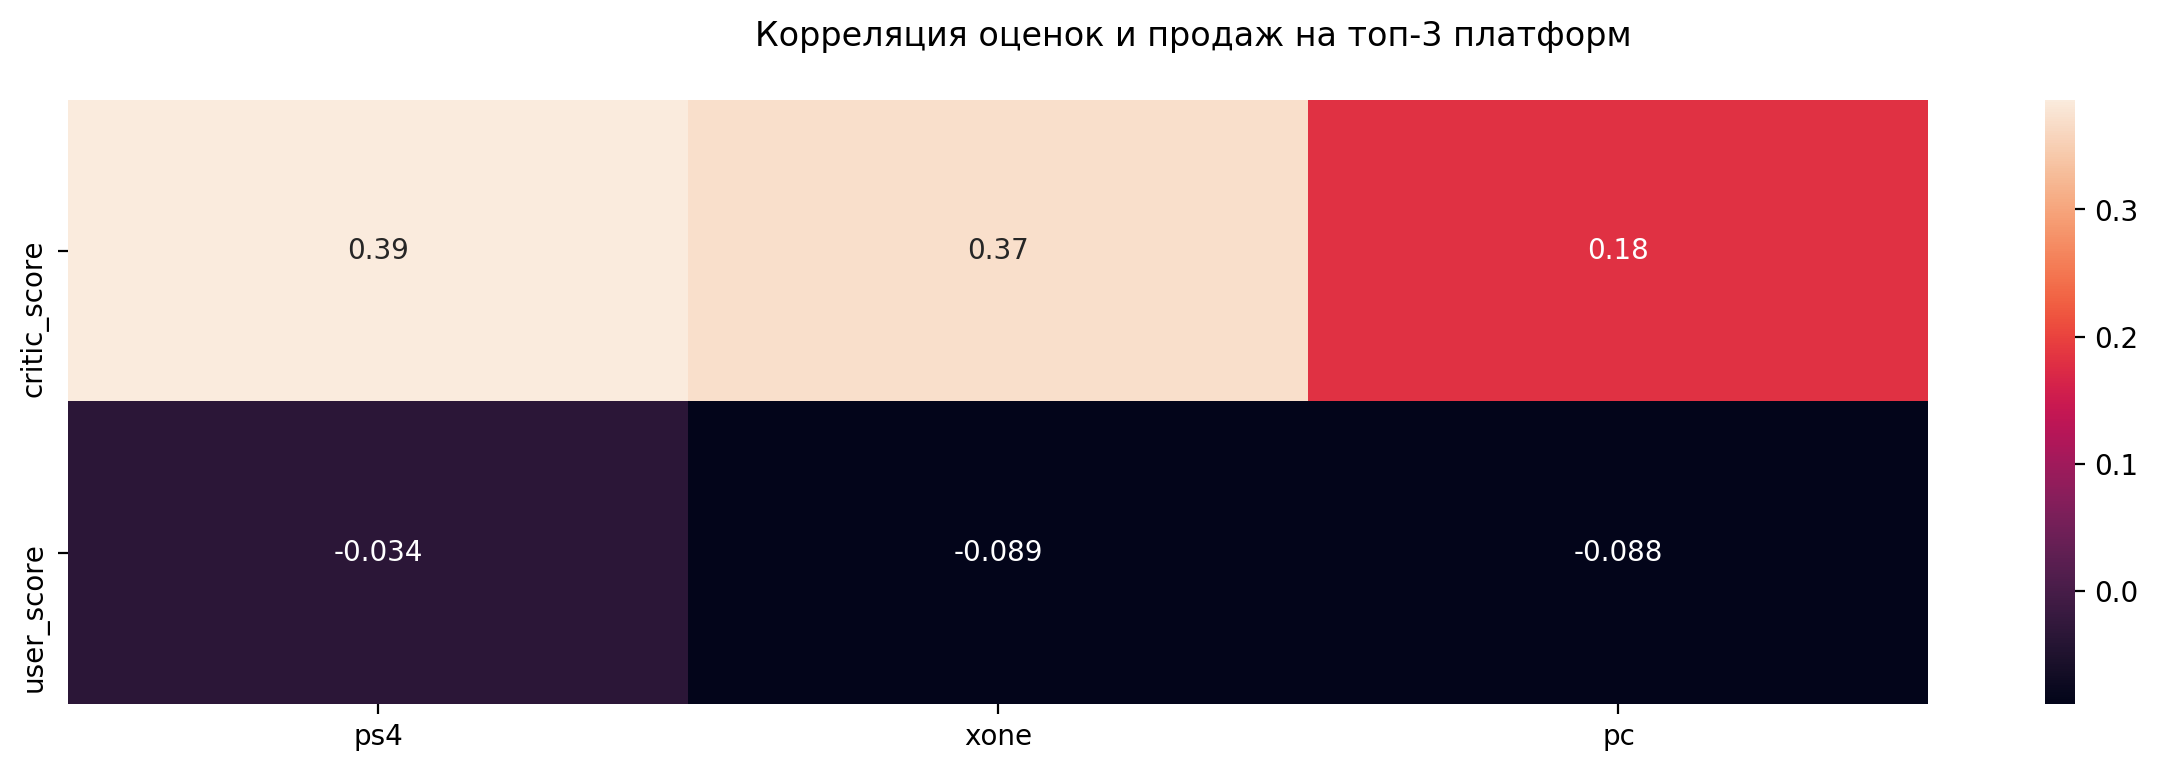

In [64]:
# Изобразим на графике
with Image(st='Корреляция оценок и продаж на топ-3 платформ'):
    sns.heatmap(top_corr, annot=True)

- Наибольшая корреляция продаж и отзывов критиков присуща PS4 и Xbox One.
- Аналогично имеется отрицательная корреляция между отзывами игроков и продажами. И действительно, есть случаи, когда разработчики перестают поддерживать и верить в игры, которые на самом деле нравятся игрокам.

Как мы видим, **критики способны** в заметной мере **влиять на продаваемость игр**. Интернет-магазину стоит обратить внимание **в первую очередь** на **те игры, которые получают высокие оценки критиков**.

---

### Жанры видеоигр
Посмотрим на распределение игр по жанрам и узнаем, какие жанры сейчас популярны.

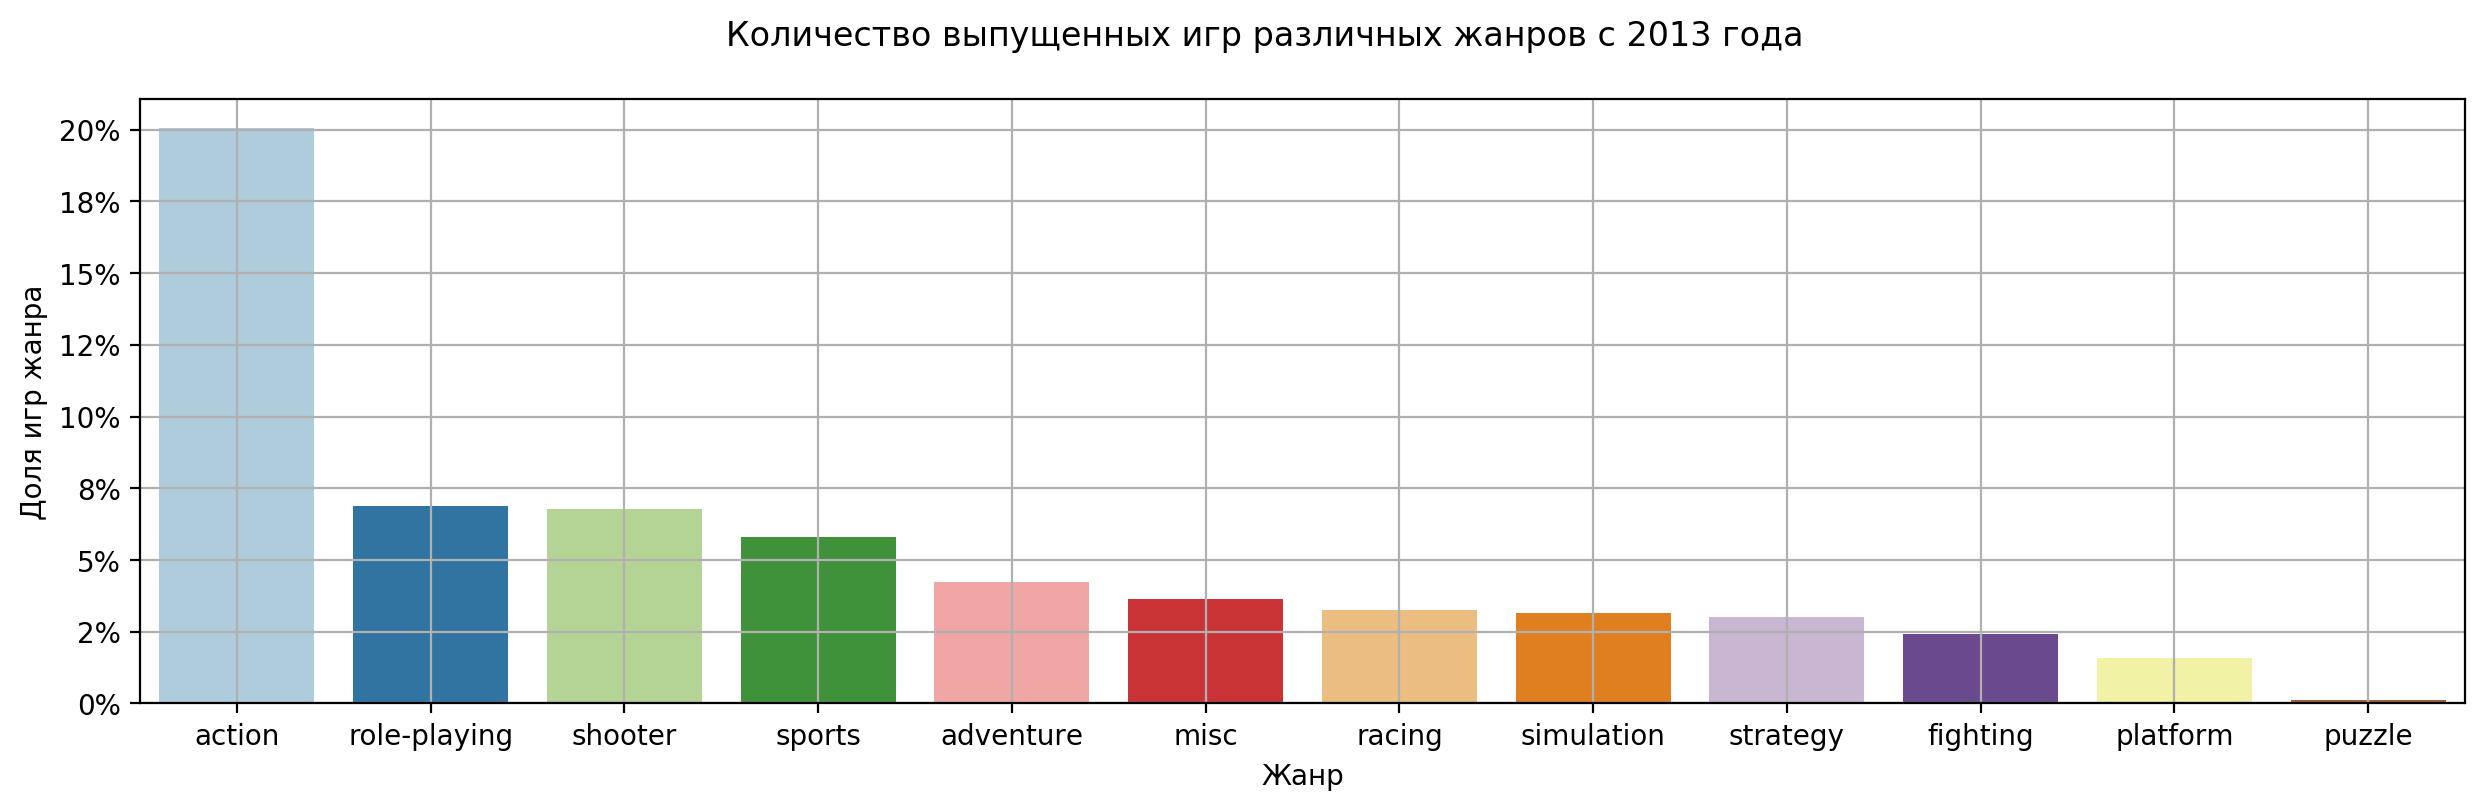

In [65]:
from matplotlib.ticker import PercentFormatter


# Сделаем вычисления в процентах
percenter = PercentFormatter(xmax=1, decimals=0)

with Image(st='Количество выпущенных игр различных жанров с 2013 года', grid=True):
    # Отбросим дублирующиеся игры, чтобы не учитывать их два раза
    genre_count = (top.drop_duplicates(subset='name')
                   .groupby('genre').agg({'name': lambda x: x.count() / len(top)})
                   .sort_values('name', ascending=False))
                
    sns.barplot(x=genre_count.index,
                y=genre_count.name,
                palette=sns.color_palette('Paired'))
    Image.format_axis(1, percenter)
    Image.labels('Жанр', 'Доля игр жанра')

Видим, что чаще всего выходят игры следующих жанров:
1. Экшн
2. RPG
3. Шутеры
4. Спорт
5. Приключения


Причём экшн представлен в подавляющем большинстве.

Посмотрим, какие из жанров наиболее выигрышны с точки зрения прибыли. *Туда ли разработчики прикладывают свои силы?*

---

### Прибыльность жанров

In [66]:
# Посчитаем прибыльность жанров при помощи группировки
genre_sales = top.groupby('genre').agg({'total_sales': lambda x: x.sum() / top.total_sales.sum()}).sort_values('total_sales', ascending=False)
genre_sales.head()

,total_sales
genre,
shooter,0.309482
action,0.274269
sports,0.164382
role-playing,0.086588
racing,0.044649


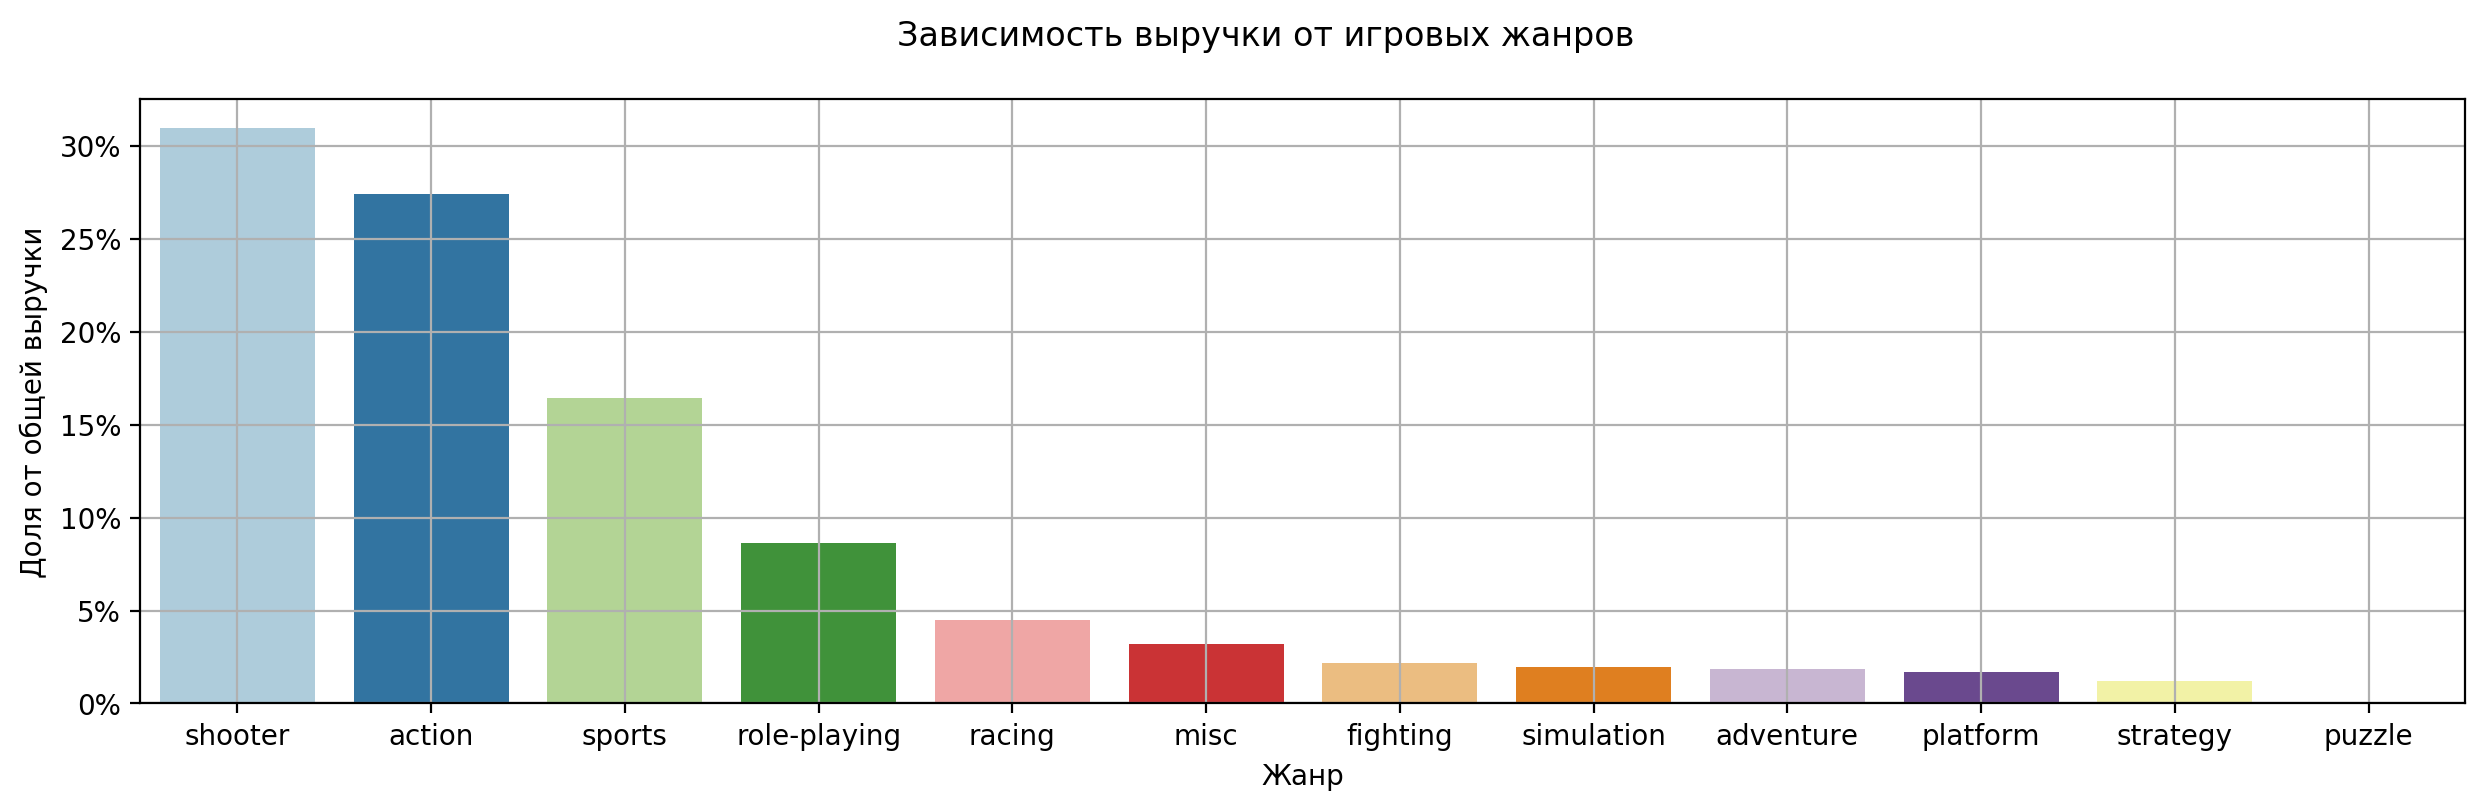

In [67]:
with Image(st='Зависимость выручки от игровых жанров', grid=True):
    sns.barplot(x=genre_sales.index, y=genre_sales.total_sales,
                palette=sns.color_palette('Paired'))
    Image.format_axis(1, percenter)
    Image.labels('Жанр', 'Доля от общей выручки')

Жанры по продажам расположены в порядке, отличном от порядка на предыдущей диаграмме: мы можем определить, сколько усилий вкладывается в жанр, и сколько прибыли это приносит. Например, доля выпускаемых шутеров - около 7%, но прибыль превышает 30% от прибыли со всех игр.
- **Максимум денег** приносят **шутеры и экшны**. Большинство людей любят такие игры. Если среди них есть онлайн-игры, то это может давать большие возможности для обогащения через внутриигровые покупки.
- Исключительно неприбыльные игры - это головоломки: надо думать, платформы уровня PS4 и Xbox One не предназначены для такого рода игр, и игроки отдают предпочтение более масштабным проектам, а в небольшие игры играют скорее на мобильных устройствах.

### Вывод из исследовательского анализа данных
- Мы выделили **актуальный временной период** с *2013* года, основываясь на характерном времени поддержки наиболее успешных платформ (*5* лет) и на данных о молодых игровых платформах, популярных в последние годы.
- Определили перспективные платформы с наибольшим потенциалом для продаж.
- Обнаружили разницу в продаваемости между ПК и консолями: **консоли имеют больший потенциал для выручки**.
- Выяснили, что **отзывы критиков положительно влияют на уровень продаж**, и что пользователи иногда положительно оценивают не самые финансово успешные игры. Причём такая тенденция существует и на ПК, и на консолях.
- Выявили наиболее и наименее прибыльные жанры.

На данном этапе наших исследований идеальной игрой, которую купят с наибольшей вероятностью, будет **консольный экшн-шутер с высокими оценками критиков**. Какие игры подходят под это описание?

In [68]:
# Выведем список игр с нашими критериями успешности
list(top.query(' and '.join(['platform in ["xone", "ps4"]',
                       'genre in ["shooter", "action"]',
                       'critic_score > 85'])).name.unique())

['grand theft auto v',
 "uncharted 4: a thief's end",
 'the last of us',
 'uncharted: the nathan drake collection',
 'battlefield 1',
 'batman: arkham knight',
 'metal gear solid v: the phantom pain',
 'titanfall',
 'bloodborne',
 "assassin's creed iv: black flag",
 'overwatch',
 'destiny: the taken king',
 'middle-earth: shadow of mordor',
 'titanfall 2',
 'god of war iii',
 'dishonored 2',
 'dishonored',
 'dmc: devil may cry',
 'final fantasy xiv: heavensward']

Действительно, в выборку попадают такие масштабные проекты, как *GTA V*, *Assassin's Creed*, *Destiny* и *Battlefield*. Я и сам в такое с удовольствием играю.

---

## 4. Портреты пользователей по регионам
В этом разделе мы определим предпочтения пользователей разных регионов в платформах, жанрах и узнаем, как влияет рейтинг ESRB на продажи в каждом из них.

### Популярные платформы
Посмотрим, какие платформы предпочитают игроки разных регионов.

In [69]:
# Список интересующих нас регионов
regs = ['na_sales', 'eu_sales', 'jp_sales']

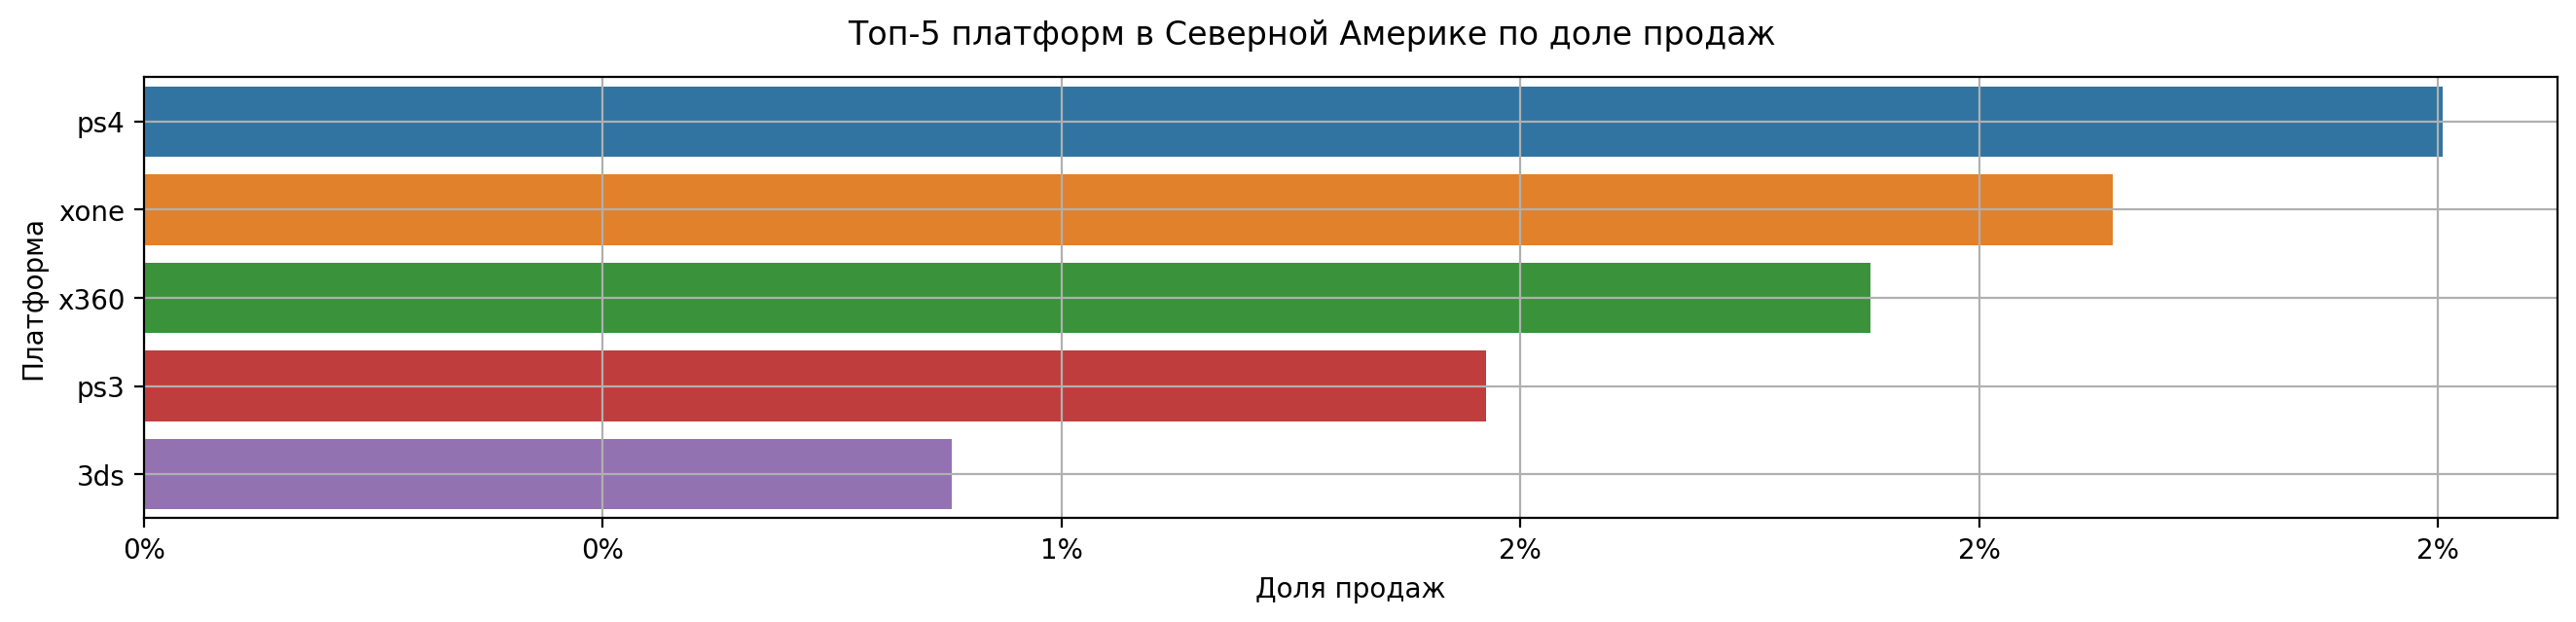

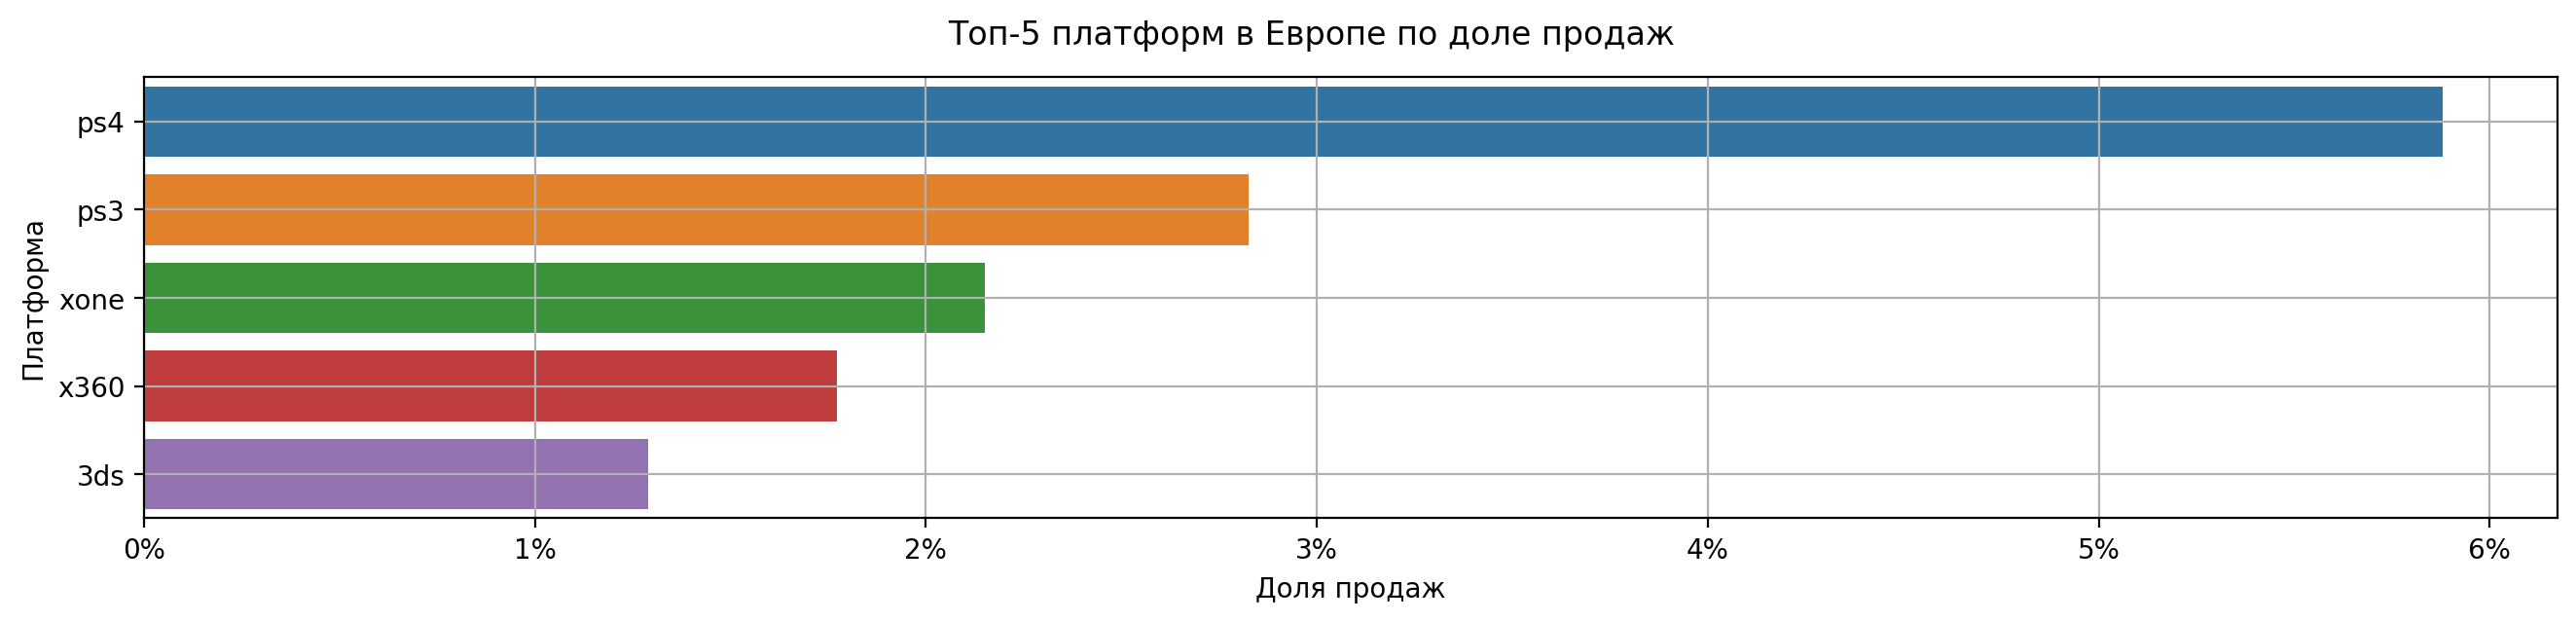

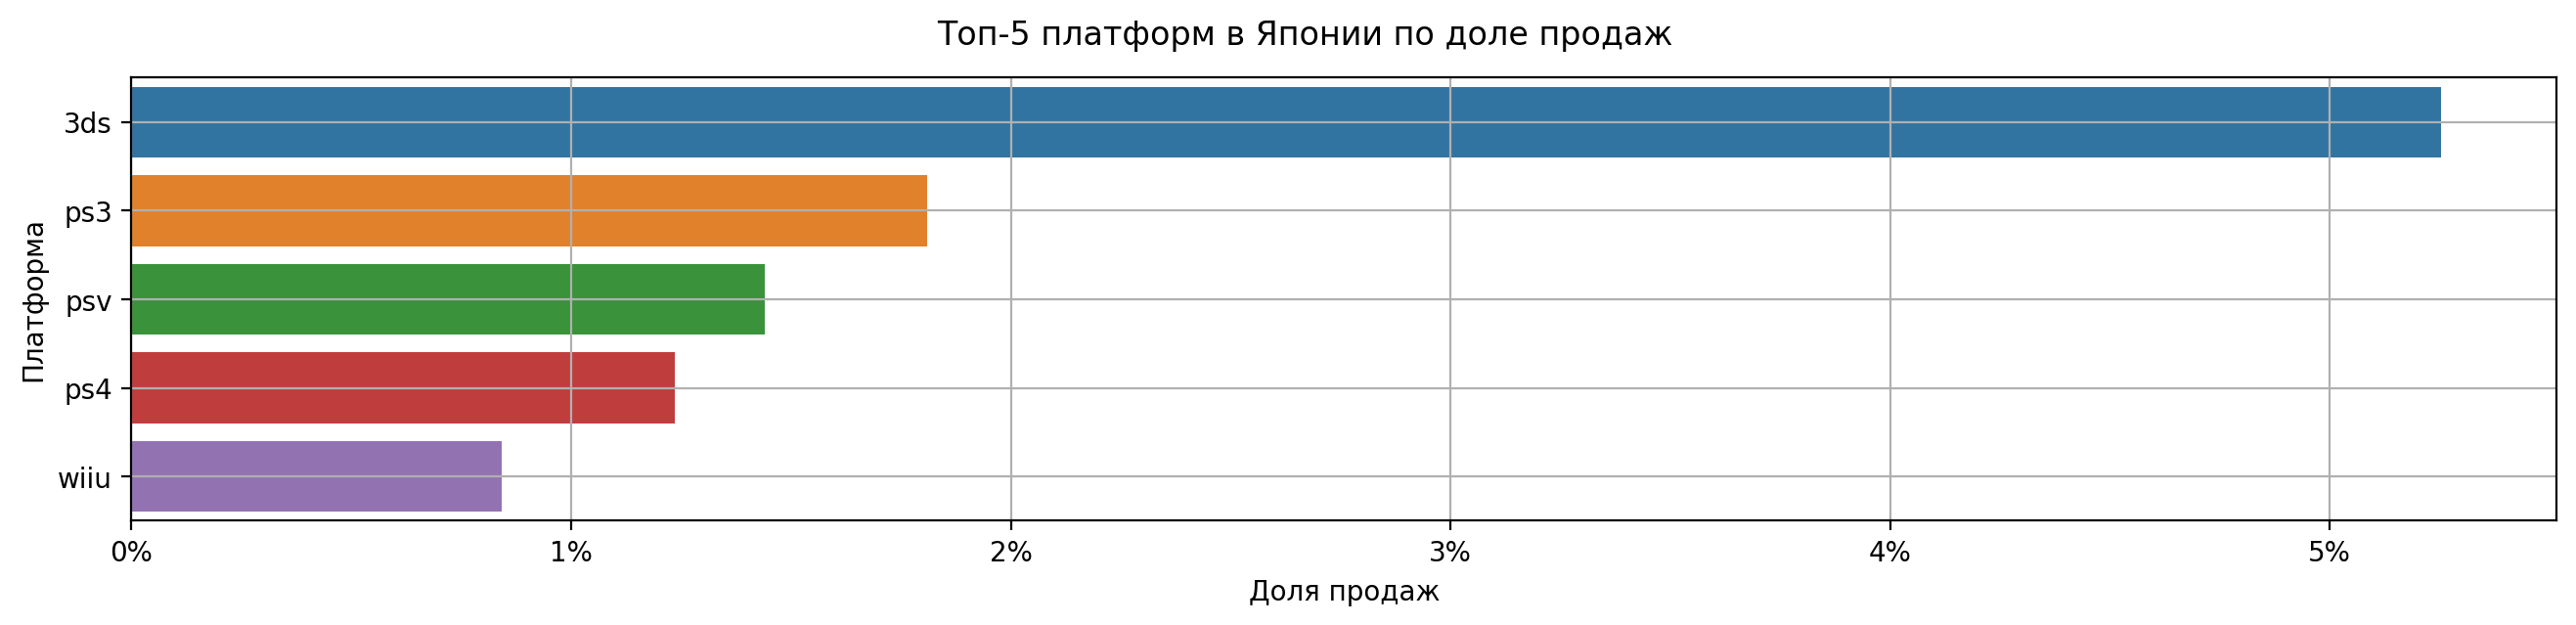

In [70]:
# Для каждого датафрейма, в котором
# агрегированы доли продаж из общей суммы по платформе
# и выбраны топ 5 самых больших долей
for df, name in zip(
    [modern.groupby('platform').agg({reg: lambda x: x.sum() / data[reg].sum()})
     .sort_values(reg, ascending=False).head(5) for reg in regs],
    ['Северной Америке', 'Европе', 'Японии']
):
    # Нарисуем диаграмму
    with Image(16, 3, st='Топ-5 платформ в ' + name + ' по доле продаж', grid=True):
        sns.barplot(y=df.index, x=df.iloc[:, 0])
        Image.format_axis(0, percenter)
        Image.labels('Доля продаж', 'Платформа')

- **В Японии** больше всего **любят** *Nintendo* и *Sony* - **консоли японского происхождения**, причём **как домашние, так и портативные**. Это может быть связано с эксклюзивными играми, которые выпускаются для японского рынка и отсутствуют где-либо ещё. Американский Xbox отсутствует в топе платформ.
- Также заметно, что в Японии Nintendo 3DS отрывается от PS3 значительнейшим образом: это может говорить о том, что игры для 3DS и аналогичных платформ, вероятно, будут успешней, чем игры для домашних консолей. Единственная беда в том, что *3DS* уже старше 5 лет и стремительно устаревает в пользу чего-то нового, а *Wii U* оказалась достаточно безперспективной.
- В Европе и Северной Америке противоположная Японии картина: **пользователи явно предпочитают домашние консоли** портативным.
- *PS4* обгоняет *Xbox One* по продажам во всех регионах.
- *ПК* не попал в топ-5 ни в одном регионе из-за малого объёма продаж.

---

### Популярные жанры
Проделаем аналогичные действия с жанрами.

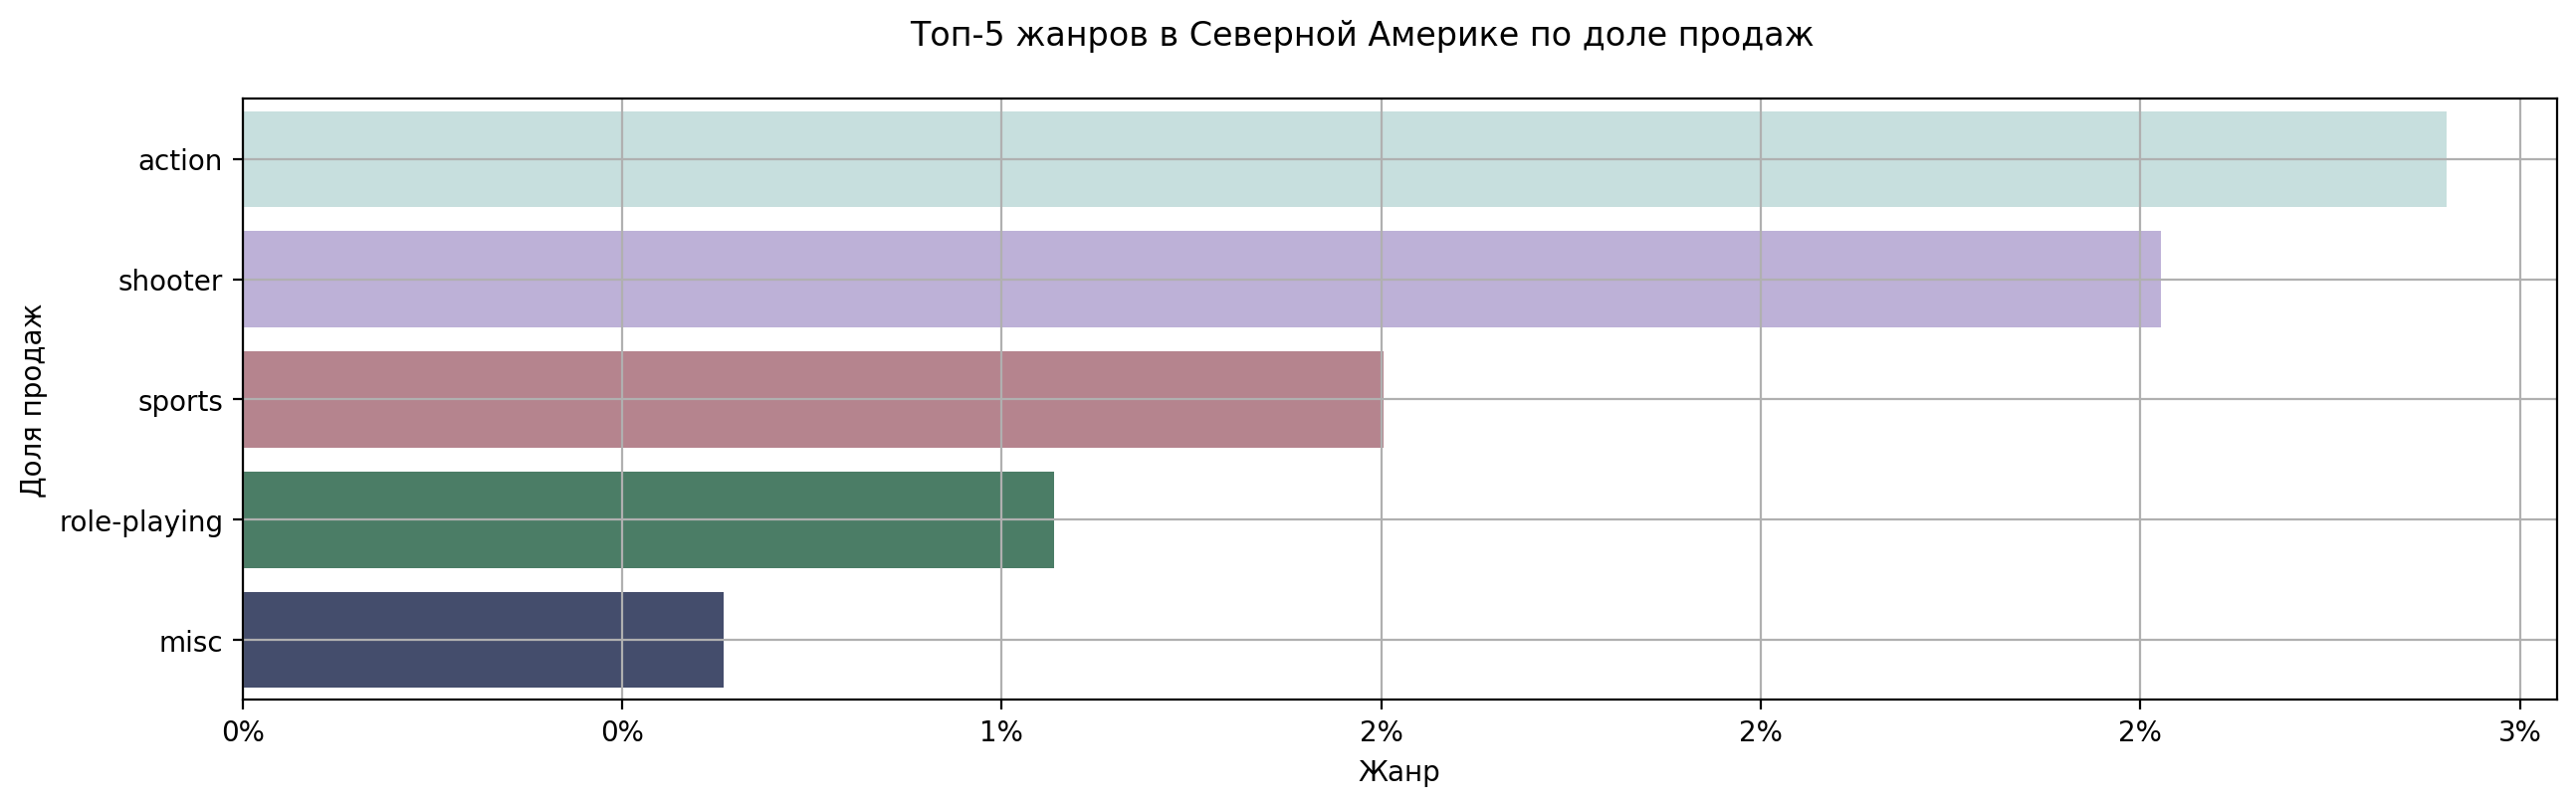

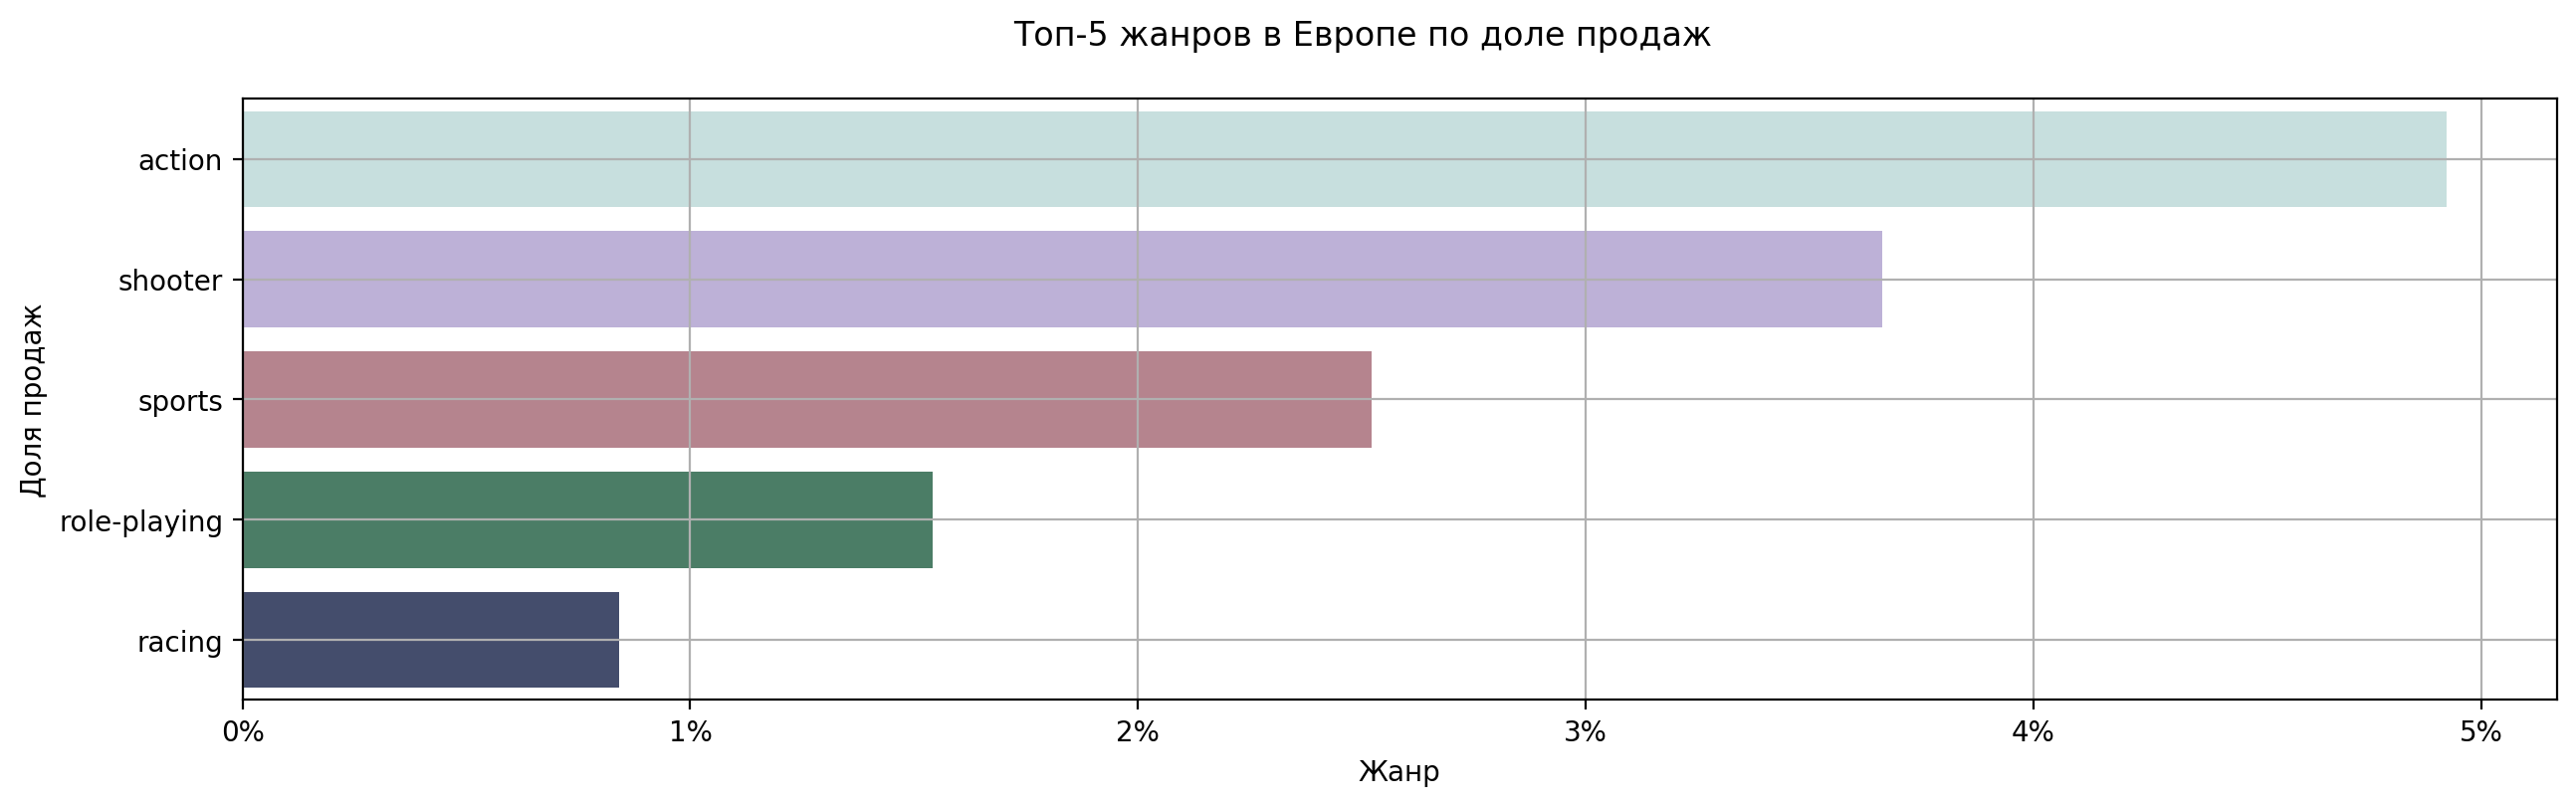

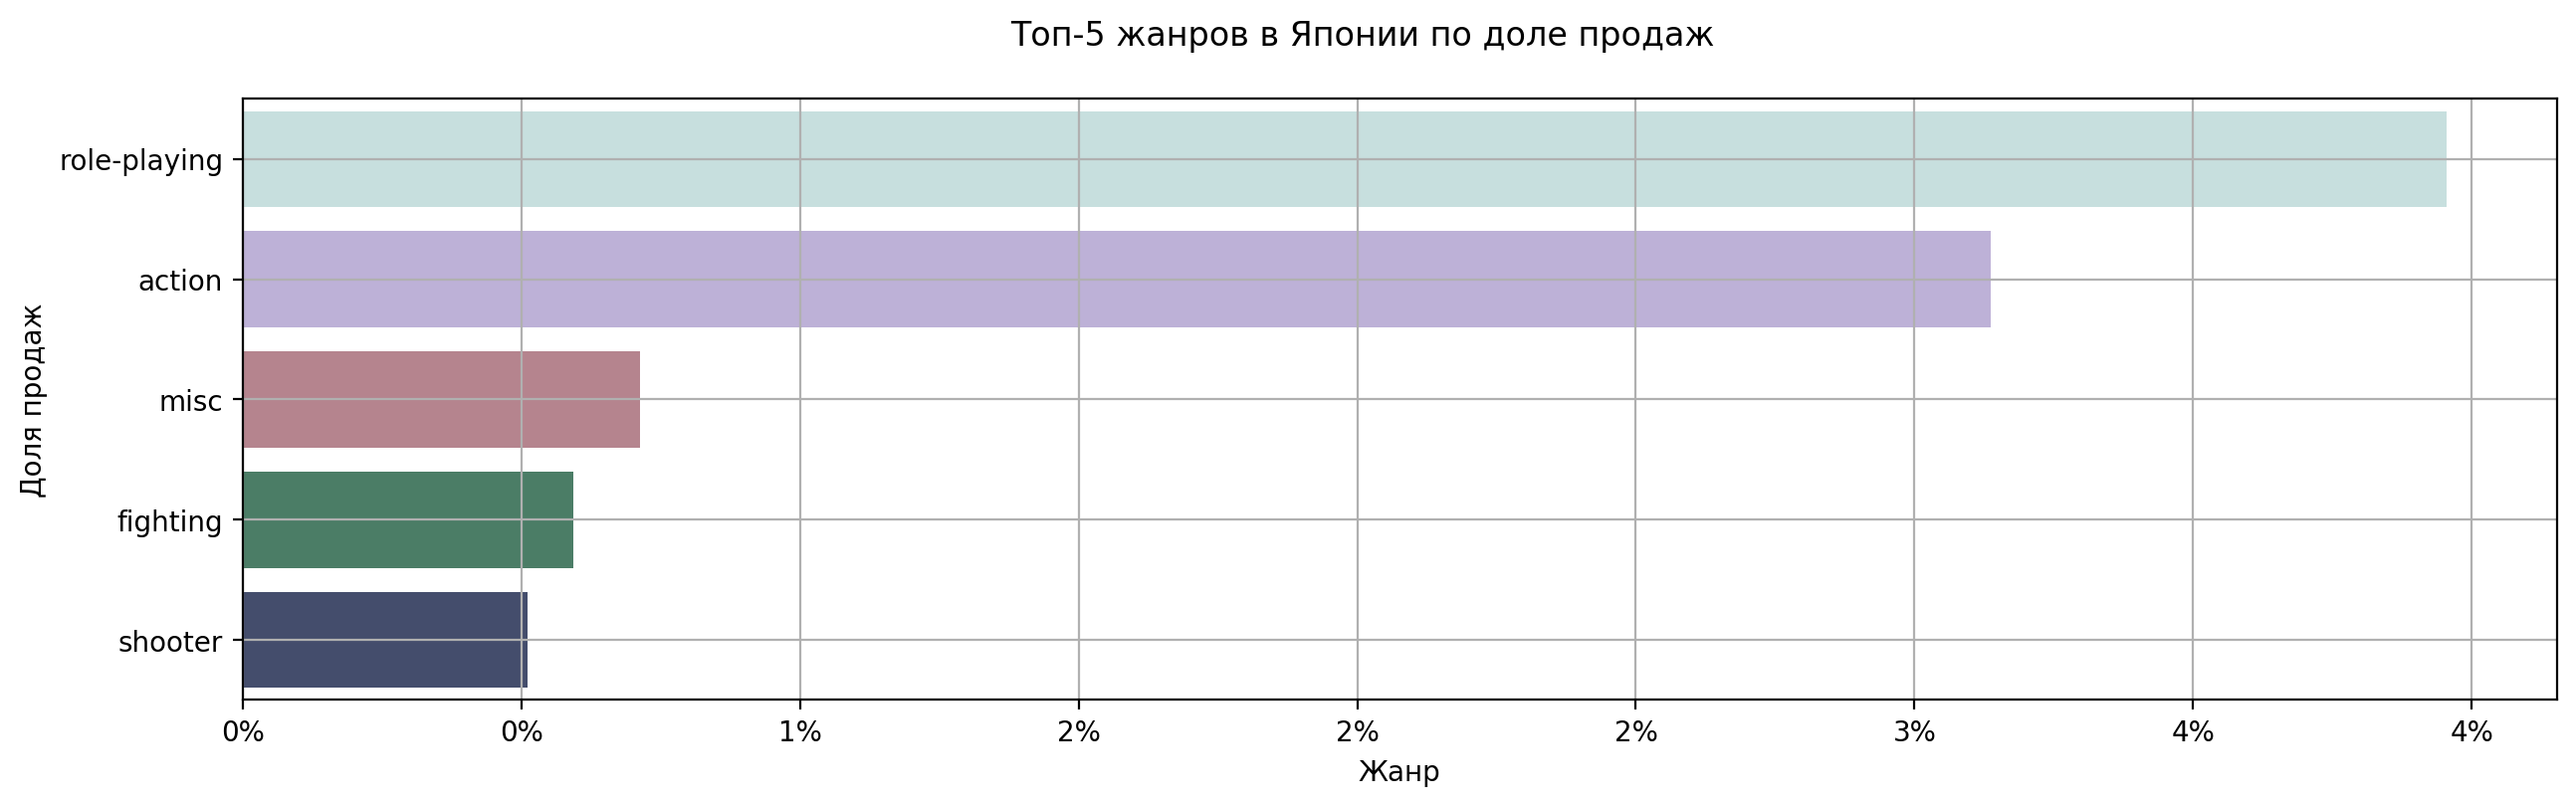

In [71]:
for df, name in zip(
    [modern.groupby('genre').agg({reg: lambda x: x.sum() / data[reg].sum()})
     .sort_values(reg, ascending=False).head(5) for reg in regs],
    ['Северной Америке', 'Европе', 'Японии']
):
    # Нарисуем диаграмму
    with Image(st='Топ-5 жанров в ' + name + ' по доле продаж', grid=True):
        sns.barplot(y=df.index, x=df.iloc[:, 0], palette=sns.cubehelix_palette(rot=55))
        Image.format_axis(0, percenter)
        Image.labels('Жанр', 'Доля продаж')

- **Европа и Северная Америка схожи** по своим главным жанровым предпочтениям: *экшны, шутеры, спортивные игры* составляют топ-3 в обоих регионах.
- Японцы больше всего любят *RPG*. Это почти наверняка связано с феноменом JRPG - уникального жанра японских ролевых игр. Особенно, если брать во внимание *3DS* и *PS Vita* и аналогичные платформы, которые изобилуют подобными играми.

---

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?
Хорошо, что мы заранее извлекли столбец с возрастом.

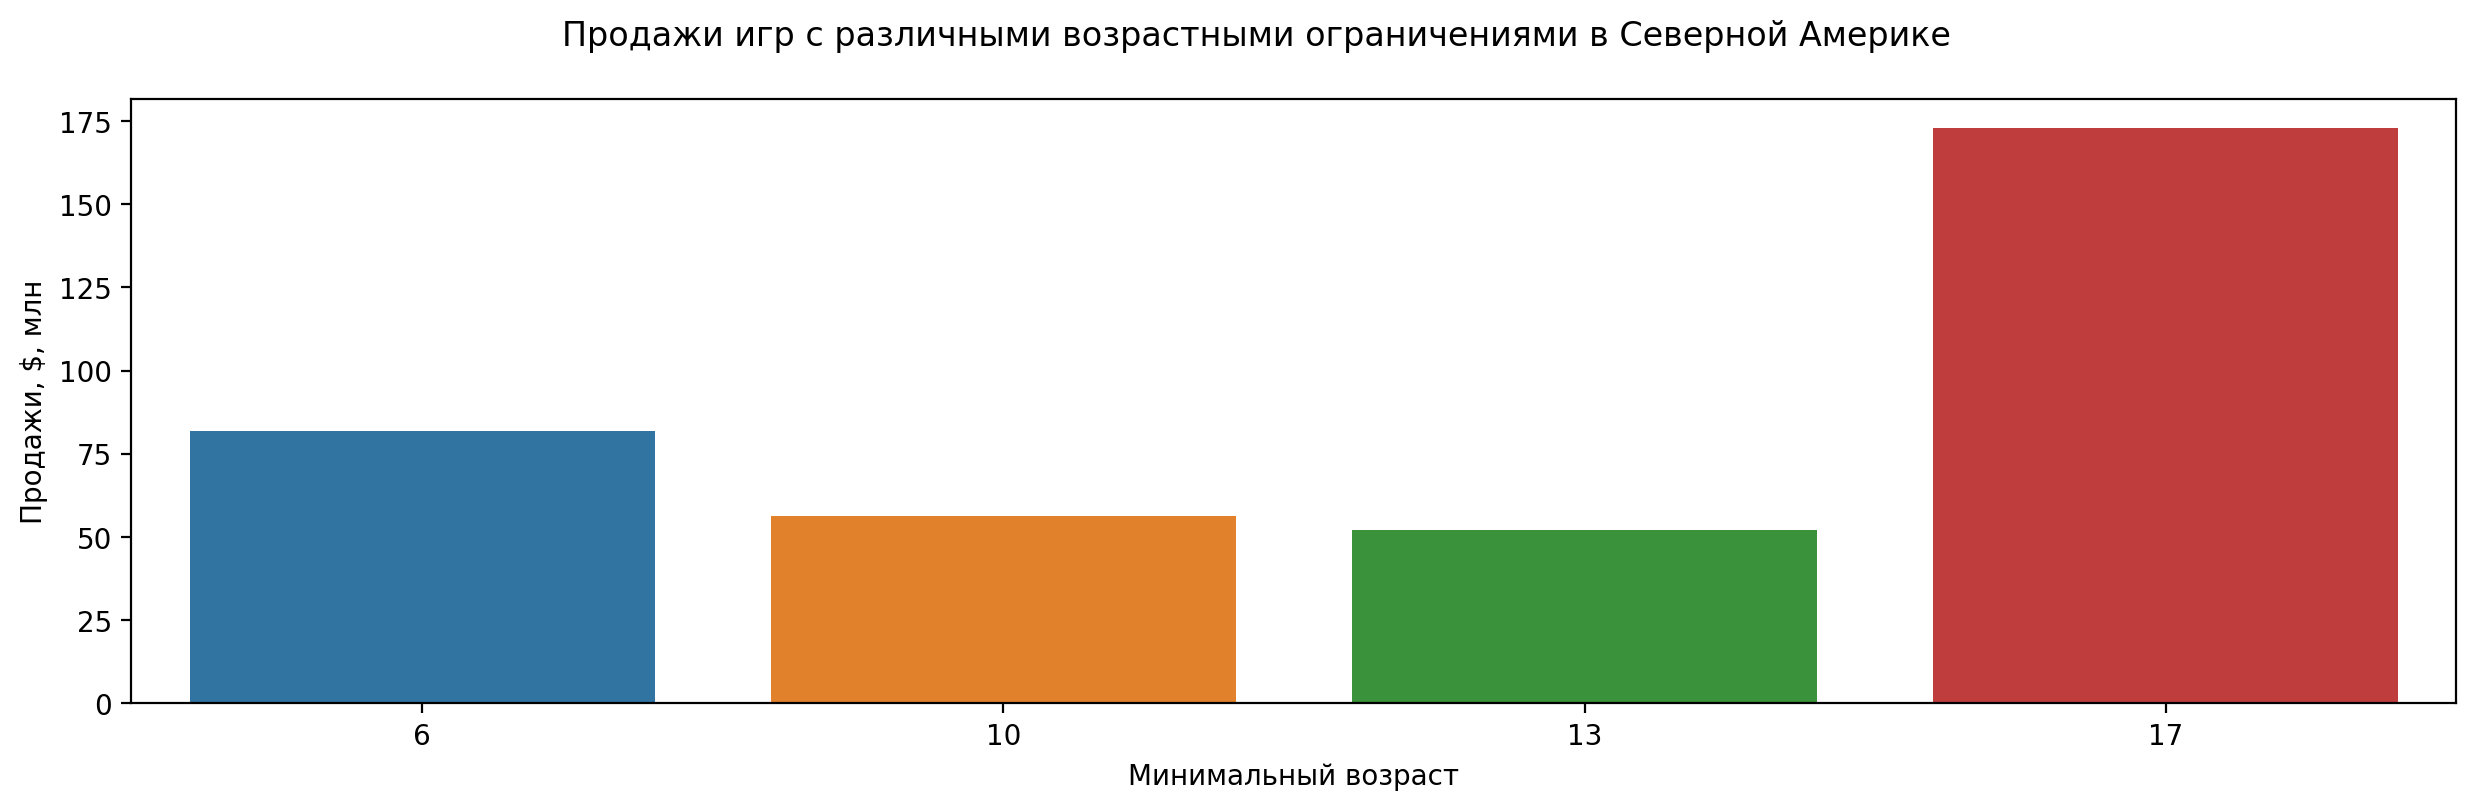

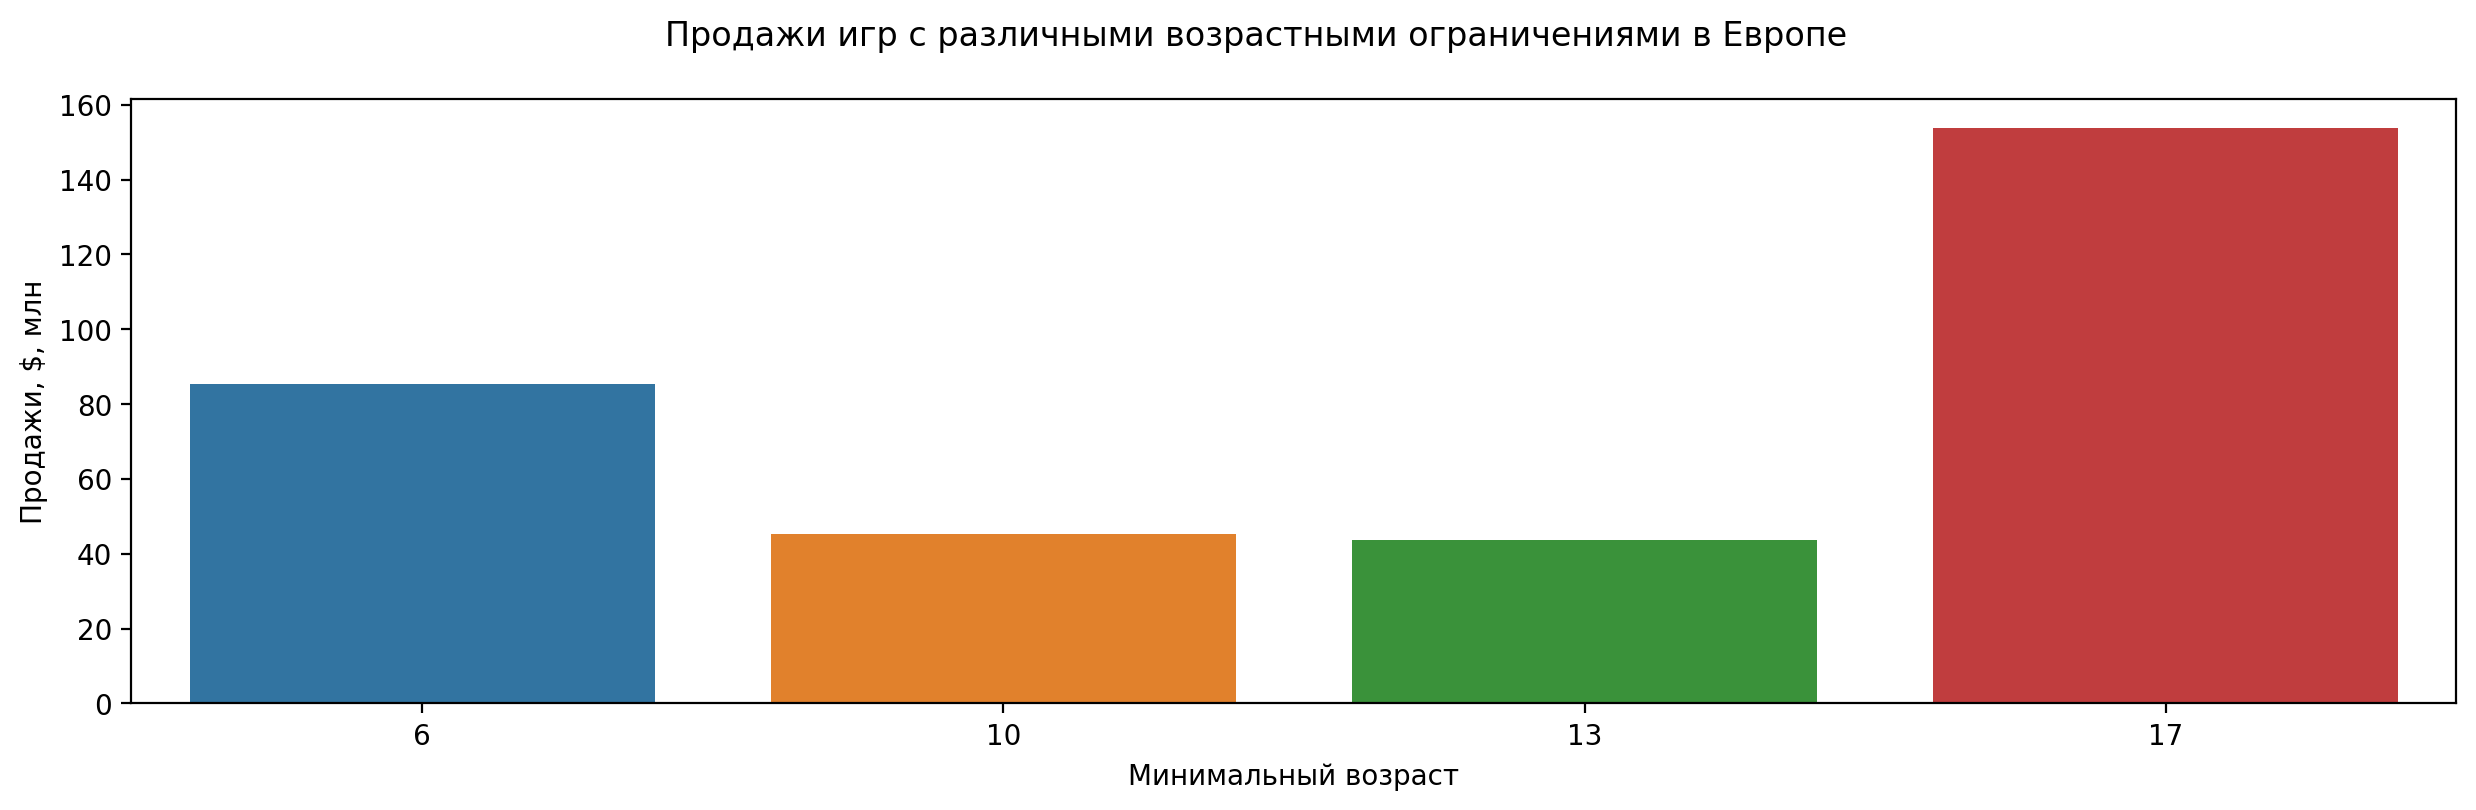

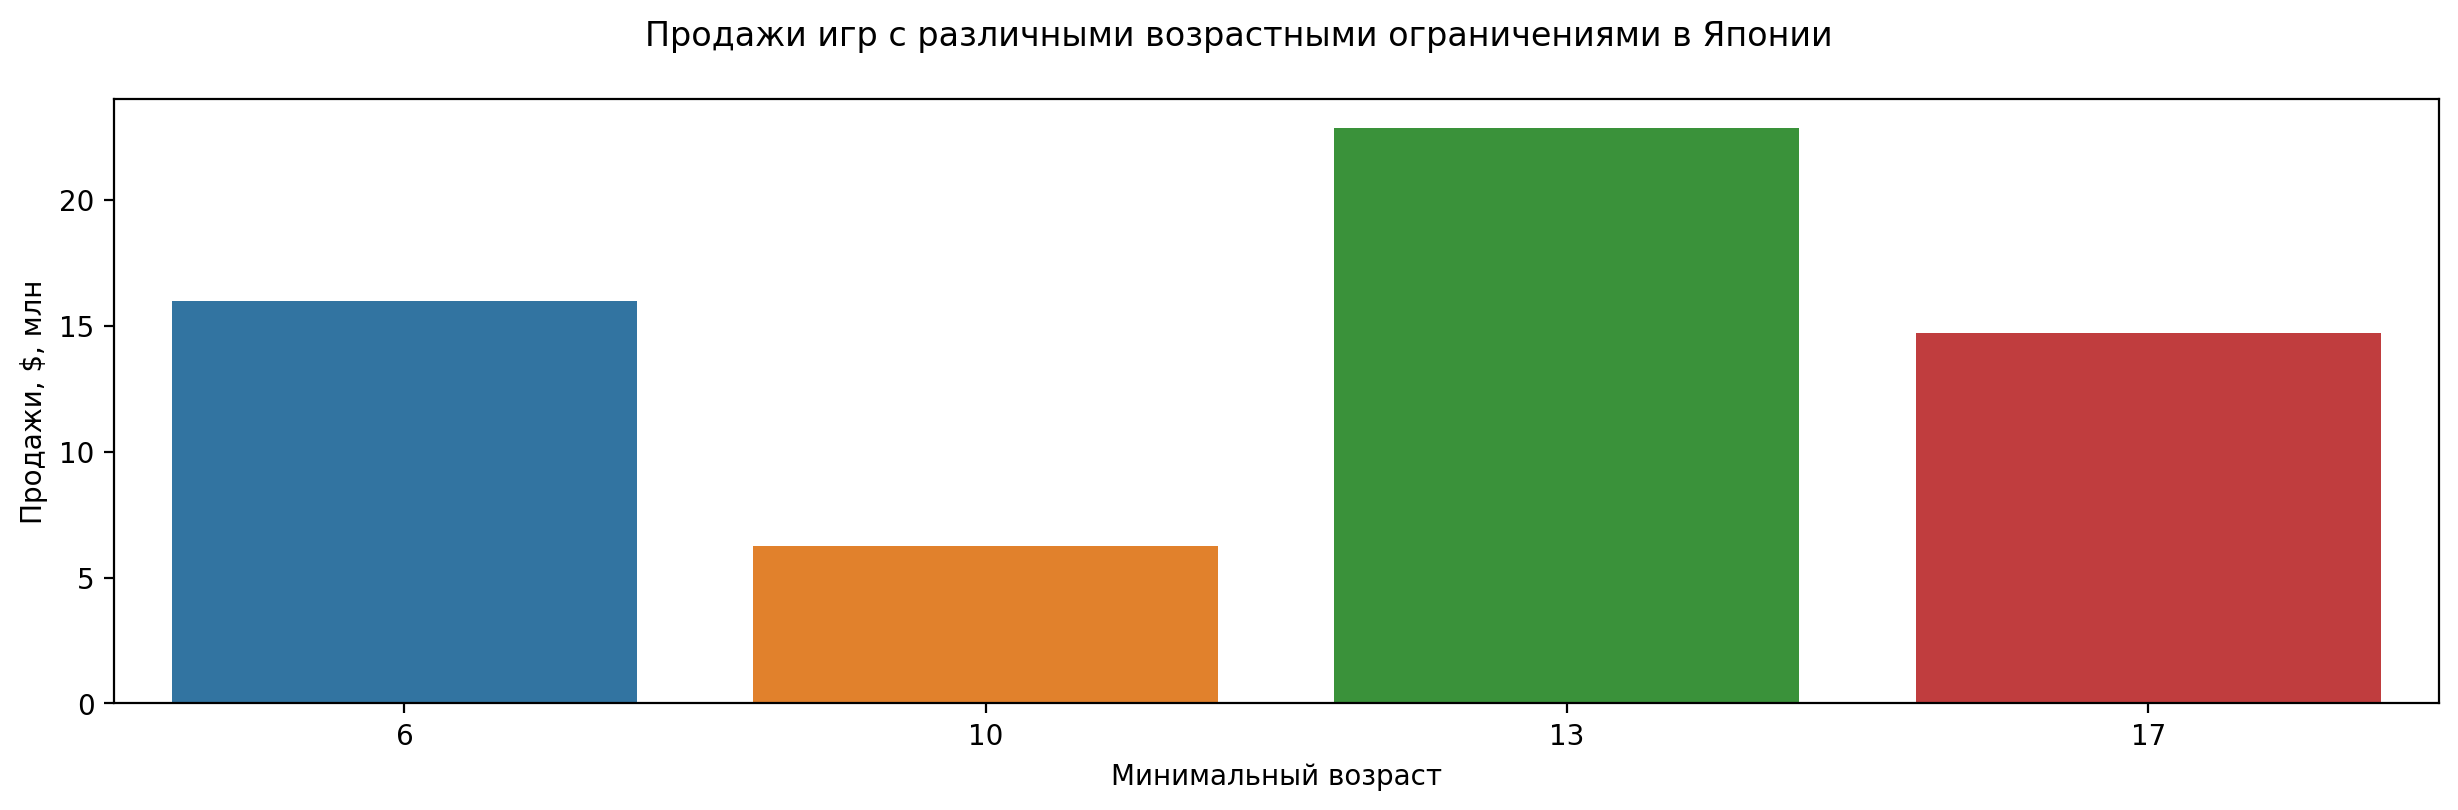

In [72]:
# Сгруппируем данные по возрастным категориям
for reg, name in zip(
    regs,
    ['Северной Америке', 'Европе', 'Японии']
):
    with Image(st='Продажи игр с различными возрастными ограничениями в ' + name):
        esrb_sales = modern.pivot_table(index='age', values=reg, aggfunc=sum)
        sns.barplot(esrb_sales.index, esrb_sales[reg])
        Image.labels('Минимальный возраст', 'Продажи, $, млн')

- На самом деле сложно сказать, зависят ли продажи в стране от рейтинга ESRB. Но мы попытаемся.
- Продажи по ESRB распределяются похожим образом во всех трёх регионах за исключением того, что в Японии продаётся больше игр, разрешённых с *13* лет, а в Европе и Северной Америке - с *17*. Почему так?
    - С одной стороны, можно подумать, что японцы больше любят игры, предназначенные для детей.
    - С другой стороны, игры, имеющие успех в Японии, могут иметь низкий возрастной рейтинг. Что, в принципе, не противоречит предыдущему высказыванию.

### Вывод из составленных портретов пользователей
- **В Европе и Америке** в целом **похожие предпочтения**: экшны, шутеры и спортивные игры для домашних консолей. Также эти игроки лучше относятся к играм с более высоким возрастным рейтингом.
- **Япония** стоит особняком: здесь больше предпочитают ролевые игры, портативные консоли, не стыдятся детских игр и чаще обходят стороной взрослые.

Учитывая эти выводы, мы можем точнее очертить круг игр и консолей, которые будут интересны для аудиторий разных регионов. Эти данные оказываются несколько точнее, чем данные по всем регионам одновременно.

---

## 5. Проверка гипотез

### Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Чтобы проверить гипотезу на равенство средних двух выборок, мы можем применить t-критерий Стьюдента. Но этот тест даёт точные результаты только для нормальных распределений, поэтому сначала мы проверим нормальность этих выборок.

In [73]:
# Функция-гипотеза
def hypo(test, alpha=0.05, oneside=False, show=True):
    """Сравнивает p-value с уровнем значимости. Проверяет гипотезу.
    
    alpha: уровень значимости
    
    oneside: делит p-value пополам
    
    show: печатает либо возвращает bool
    """
    if isinstance(test, tuple):
        pv = test[1]
    else:
        pv = test.pvalue if not oneside else test.pvalue / 2
    result = pv > alpha
    if show:
        print('p-value =', pv)
        print('p-value',
              '>' if result else '<',
              alpha)
    else:
        return result

In [74]:
# Сделаем выборки по платформам
xone_pc = ['xone', 'pc']
xone_user_score, pc_user_score = [modern.query('platform == "{}"'.format(pf)).user_score.dropna()
                                 for pf in xone_pc]

In [75]:
# Сделаем тест на нормальность распределения для обоих выборок
for pf, name in zip([xone_user_score, pc_user_score],
                    xone_pc):
    print(name)
    hypo(st.shapiro(pf))

xone
p-value = 1.4626357369706966e-06
p-value < 0.05
pc
p-value = 4.42959799329401e-06
p-value < 0.05


Оба **распределения не являются нормальными**, поэтому мы применим не t-критерий, а U-критерий Манна-Уитни.

In [76]:
# Проверим гипотезу на равенство выборок
hypo(st.mannwhitneyu(xone_user_score, pc_user_score))

p-value = 0.08274180184794316
p-value > 0.05


Тест показал пограничное, но достаточное *p-value*, чтобы не **отвергать нулевую гипотезу** о том, что средние пользовательские рейтинги платформ Xbox One и PC равны. Они слабо похожи, но не различаются совсем кардинально.

---

### Нулевая гипотеза: средние пользовательские рейтинги жанров "Экшн" и "Спорт" одинаковы.

In [77]:
# Выделим пользовательские рейтинги по интересующим нас жанрам
genres = ['action', 'sports']
action_user_score, sports_user_score = [modern.query('genre == "{}"'.format(genre)).user_score.dropna()
                                        for genre in genres]

In [78]:
# Тест на нормальность
for score, name in zip([action_user_score, sports_user_score],
                       genres):
    print(name)
    hypo(st.shapiro(score))

action
p-value = 1.0765118544782642e-15
p-value < 0.05
sports
p-value = 0.04629077389836311
p-value < 0.05


In [79]:
# Снова применяем тест Манна-Уитни
hypo(
    st.mannwhitneyu(action_user_score, sports_user_score)
)

p-value = 3.120128831086092e-29
p-value < 0.05


Здесь видим низкое значение *p-value* и **отвергаем нулевую гипотезу**. Пользовательские рейтинги спортивных и экшн-игр несопоставимы, и глядя на оценки игр одного жанра, мы **не** можем предположить, что оценки игр другого жанра будут находиться в похожем диапазоне значений.

#### Вывод из проверки гипотез
Мы посмотрели на распределения пользовательских рейтингов игр.
- У Xbox One и ПК рейтинги игр схожи, возможно, по той причине, что Xbox и ПК близки по своей аудитории и её жанровым предпочтениям.
- У жанров "Экшн" и "Спорт" рейтинги различаются - это может означать, что игры этих двух жанров **в разной степени оправдывают ожидания** своих игроков.

---

## 6. Общий вывод
***По предобработке***:
- Мы бережно подошли к проблеме пропусков в данных и **постарались заполнить** их настолько **правдоподобно**, насколько позволило нам очевидное решение с заполнением по самой игре.
- Изменили типы данных **только там, где это** действительно **способствовало решению** наших задач.
- Перевели рейтинг ESRB в **человекопонятный вид**.

***По исследовательскому анализу***:
- Мы изучили **исторические данные** о популярности различных игровых платформ.
- Выяснили примерное время **здорового существования** одного поколения платформ на примере самых распространённых консолей.
- Выбрали **актуальный период времени** с *2013* года, на основе которого происходил наш дальнейший анализ.
- Определили наиболее **перспективные** игровые платформы современности.
- Оценили **влияние отзывов** критиков и пользователей на продаваемость игр.
- Определили наиболее и наименее **кассовые жанры** игр.
- Сформировали общее представление о том, **какие игры** лучше всего **продаются**.

***По портретам пользователей из разных регионов***:
- Мы определили предпочтения пользователей в:
    - Жанрах игр,
    - Платформах,
    - Возрастных рейтингах.

Эта информация поможет нам **уточнить** и подогнать общие закономерности под особенности регионов.

***По проверке гипотез***:

Мы выяснили, что:
- Средние значения пользовательских рейтингов для *Xbox One* и *ПК* схожи.
- Средние оценки пользователей для *экшнов* и *спортивных игр* различаются.

---